<a href="https://colab.research.google.com/github/pawan070bct27/Data_Analysis_Updated/blob/main/Data_Month3_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#IMPORTING NECESSARY LIBRARIES




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import matplotlib
import pylab as pl
warnings.filterwarnings("ignore")

#LOADING THE DATASET

In [ ]:
df = pd.read_csv('Project Data_ Month 3 - raw_data.csv',parse_dates=['date'])
df

,date,device,creative_id,ad_unit_id,publisher_split,impressions,referrals,conversions
0,2018-01-01,Desktop,20,1,0.03,4,0,0
1,2018-01-01,Desktop,25,1,0.06,7,1,0
2,2018-01-01,Desktop,15,1,0.18,22,2,0
3,2018-01-01,Desktop,13,1,0.22,27,1,0
4,2018-01-01,Desktop,16,1,0.24,30,1,0
...,...,...,...,...,...,...,...,...
128506,2018-01-31,Other,32,Organic,0.00,0,0,0
128507,2018-01-31,Other,31,Organic,0.00,0,0,0
128508,2018-01-31,Other,38,Organic,0.00,0,0,0
128509,2018-01-31,Tablet,28,Organic,0.00,205,0,0


#Describing the statistical property of each column of dataset




In [ ]:
df.describe()

,creative_id,publisher_split,impressions,referrals,conversions
count,128511.000000,128511.000000,128511.000000,128511.000000,128511.000000
mean,23.585654,0.859615,605.703154,7.132806,0.021850
std,9.121881,8.778826,5862.714891,75.056492,0.245743
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,3.000000,0.000000,0.000000
50%,24.000000,0.020000,15.000000,0.000000,0.000000
75%,30.000000,0.120000,101.000000,1.000000,0.000000
max,58.000000,798.780000,636282.000000,6849.000000,20.000000


# More information on columns of dataset



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128511 entries, 0 to 128510
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             128511 non-null  datetime64[ns]
 1   device           128511 non-null  object        
 2   creative_id      128511 non-null  int64         
 3   ad_unit_id       128511 non-null  object        
 4   publisher_split  128511 non-null  float64       
 5   impressions      128511 non-null  int64         
 6   referrals        128511 non-null  int64         
 7   conversions      128511 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 7.8+ MB


# Finding the correlation relationship between each columns.

In [ ]:
corr_relation = df.corr()
corr_relation

,creative_id,publisher_split,impressions,referrals,conversions
creative_id,1.000000,-0.025557,-0.020681,-0.011349,-0.027464
publisher_split,-0.025557,1.000000,0.919400,0.829694,0.638914
impressions,-0.020681,0.919400,1.000000,0.844731,0.542753
referrals,-0.011349,0.829694,0.844731,1.000000,0.672767
conversions,-0.027464,0.638914,0.542753,0.672767,1.000000


#Let's visualize the correlation between each columns.

([<matplotlib.axis.YTick at 0x7fd88a998550>,
 [Text(0, 0, 'creative_id'),
  Text(0, 0, 'publisher_split'),
  Text(0, 0, 'impressions'),
  Text(0, 0, 'referrals'),
  Text(0, 0, 'conversions')])

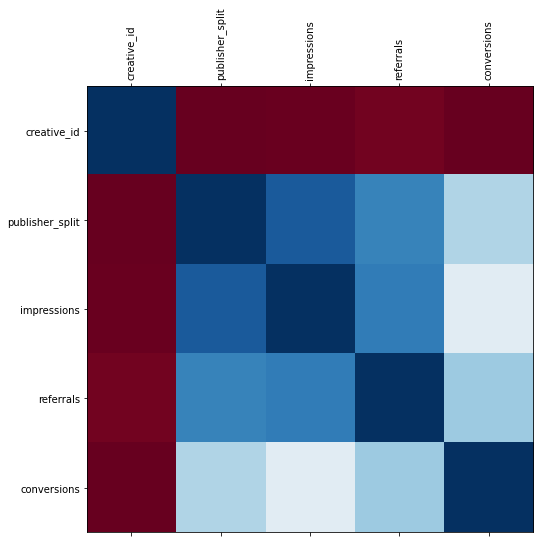

In [ ]:
# visualization
fig = plt.figure(figsize=(8,8))
plt.matshow(corr_relation, cmap = 'RdBu',fignum= fig.number)
plt.xticks(range(len(corr_relation.columns)), corr_relation.columns, rotation = 'vertical')
plt.yticks(range(len(corr_relation.columns)), corr_relation.columns)

In the figure above Dark blue represents the highest correlation and dark red represents the lowest correlation.
From the above figure we can make following observation:

* Creative id and conversion has very weak correlation. That is the they are independent to each other without any relationship. Let's explore them below:


#Comparison of impressions, referrals and conversions with respect to the device type.

     Device  Action Type  Frequency  log(Frequency)
0   Desktop  conversions       1242        3.094122
1   Desktop  impressions   25385238        7.404581
2   Desktop    referrals     242953        5.385522
3    Mobile  conversions       1059        3.024896
4    Mobile  impressions   37388942        7.572743
5    Mobile    referrals     439883        5.643337
6    Tablet  conversions        507        2.705008
7    Tablet  impressions   15064994        7.177969
8    Tablet    referrals     233652        5.368570
9     Other  conversions          0            -inf
10    Other  impressions        344        2.536558
11    Other    referrals        156        2.193125


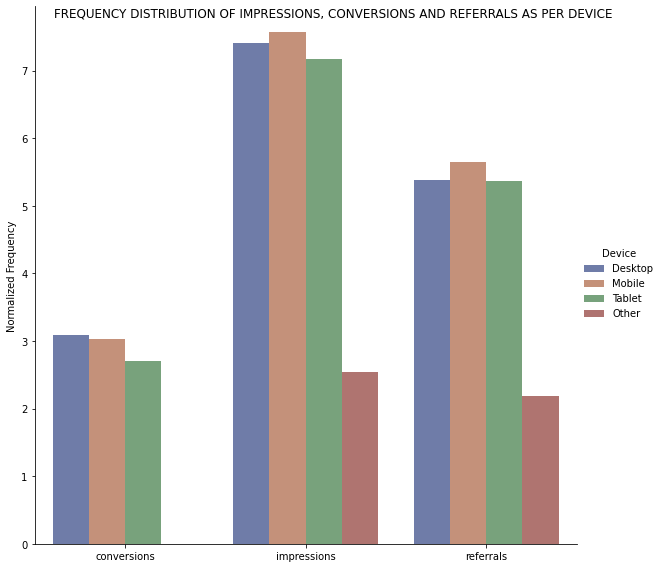

In [ ]:
# Creating a new data table including device type and frquency of Conversions, Impressions and Referrals
new_df_rows = []
for device in df['device'].unique():
  rows = df[df['device'] == device]
  total_conversions = rows['conversions'].sum()
  total_impressions = rows['impressions'].sum()
  total_referrals  = rows['referrals'].sum()
  new_df_rows.append([device,'conversions',total_conversions])
  new_df_rows.append([device,'impressions',total_impressions])
  new_df_rows.append([device,'referrals',total_referrals])

# Normalization of frequency, using logarithmic function, for clear visibility of graph 
new_df = pd.DataFrame(new_df_rows, columns=['Device', 'Action Type', 'Frequency'])
new_df['log(Frequency)'] = np.log10(new_df['Frequency'])
print(new_df)

#Visualization
with pd.option_context('mode.use_inf_as_na', True):
  g = sns.catplot(
      data=new_df, kind="bar",
      x="Action Type", y="log(Frequency)", hue="Device",
      ci="sd", palette="dark", alpha=.6, height=8
  )
  g.set_axis_labels("", "Normalized Frequency")
  g.fig.suptitle('FREQUENCY DISTRIBUTION OF IMPRESSIONS, CONVERSIONS AND REFERRALS AS PER DEVICE')

#Mobile:

* Referrals per impression = 5.4 / 7.7 = 0.70

* Conversion per impression = 3 / 7.7 = 0.38

* Conversions per referral = 3 / 5.4 = 0.55

#Desktop:

* Referrals per impression = 5.4 / 7.5 = 0.72

* Conversions per impression = 3.1 / 7.5 = 0.41

* Conversions per referral = 3.1 / 5.4 = 0.57

#Tablet:

* Referrals per impression = 5.5 / 7.2 = 0.76

* Conversions per impression = 2.7 / 7.2 = 0.37

* Conversions per referral = 2.7 / 5.5 = 0.49

#Other :

 * Referrals per impression = 2.5 / 2.2 = 0.88



From the graph above we can infer following observations:


* Conversions to impressions ratio is high for Desktop device. Desktop visitors contribute for biggest portion of revenue for the company.

* There are no any conversions from Other devices. The Other devices are increasing the cost with no any contribution in revenue.

* Referrals to impressions ratio is high for Other device and low for mobile device. That is the reach of ad to target users  are least for mobile devices and high for Other devices.

* Conversions to referalls ratio is high for Desktop and least for Tablet. That is the most ad visitors from Tablet don't want what you are offering them. But, the ad visitors from the Desktop is liking the offering from ad.

* Ad visitors from Other devices don't want what you are offering them at all.



#Recommendations:

1. Boost up the impressions on Desktop devices. Since, they they have highest contribution in the conversions of target audience. 

2. Focus on seeing the ad by target audience for mobile device. Ad unit might responsible for it.

3. Focus on offering made to the ad visitor for Tablet and Other device. Creative unit id might be responsible for it.


## Let's visualize the relationship between creative id and conversions for each device type.

#Firstly, let's define a function that takes type of device as an argument and returns data frame with necessary conditions




In [ ]:
def conversion_vs_creative(device):
  df_conversion_vs_creative = []
  for creative_id in df['creative_id'].unique():
    rows = df[(df['creative_id'] == creative_id) & (df['device'] == device)]
    c = rows['conversions'].sum()
    df_conversion_vs_creative.append([creative_id,c])
  df_conversion_vs_creative = pd.DataFrame(df_conversion_vs_creative, columns=['creative_id', 'conversions'])
  df_conversion_vs_creative = df_conversion_vs_creative.sort_values(by=['creative_id'])
  # visualization
  df_conversion_vs_creative.plot(x = 'creative_id', y = 'conversions', kind ='bar', figsize = (20,8),rot = 0, title = 'Conversions Vs creative id when devices used were :'+str(device))
  plt.ylabel('Conversions')
  return df_conversion_vs_creative

1. **Conversions Vs creative id when Desktop Devices were used**

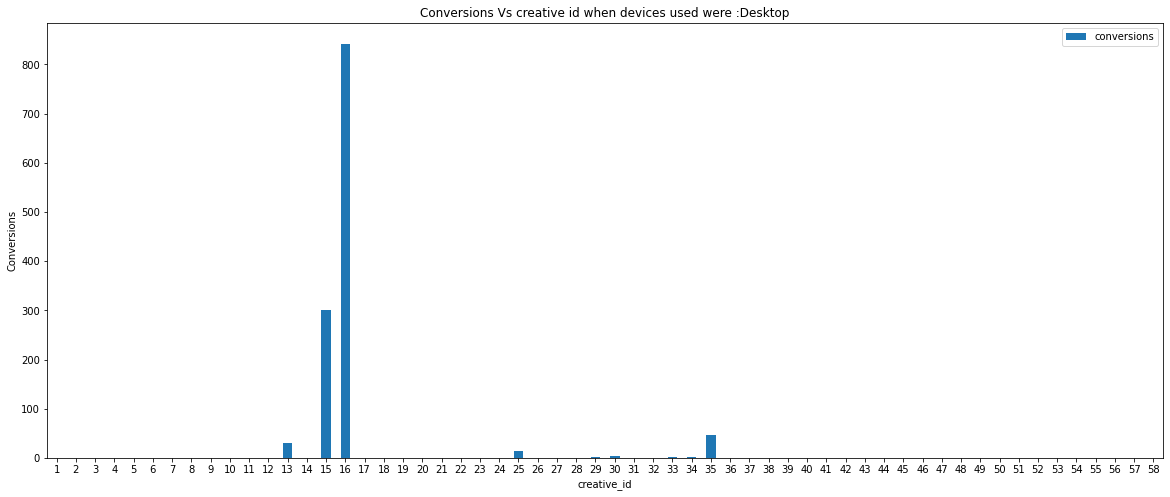

In [ ]:
 conv_vs_creative_Desktop_df = conversion_vs_creative('Desktop') #Function call

We can see that, for Desktop Devices, creative id's 13 , 15, 16, 25 and 35 only have contribution in conversions. Creative id 16 has highest number of conversions. I recommend using those creative id's and excluding others for reducing cost and maximizing the revenue of the company.



2.  **Conversions Vs creative id when Mobile Devices were used**




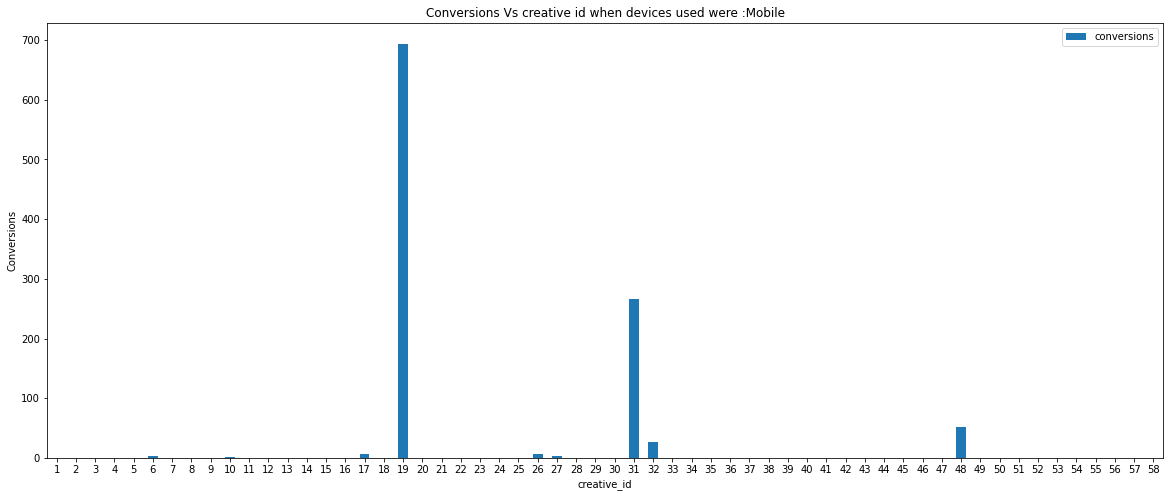

In [ ]:
conv_vs_creative_Mobile_df = conversion_vs_creative('Mobile') #Function call

We can see that, for Mobile Devices, creative id's 17, 19, 26, 31, 32 only have contribution in conversions. Creative id 19 has highest number of conversions. I recommend using those creative id's and excluding others for reducing cost and maximizing the revenue of the company.



---



3.  **Conversions Vs creative id when Tablet Devices were used**

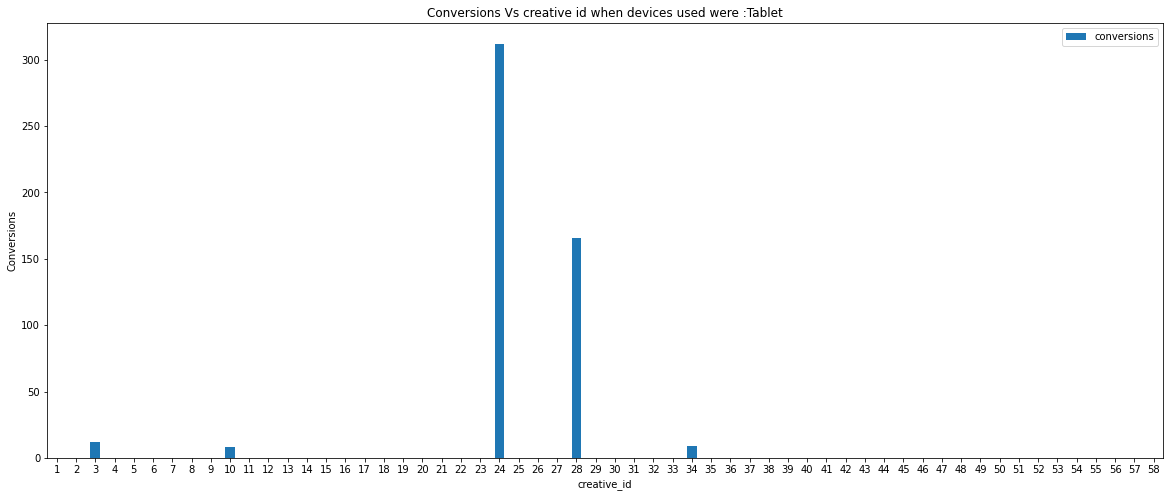

In [ ]:
conv_vs_creative_Tablet_df = conversion_vs_creative('Tablet') #Function call

We can see that, for Tablet Devices, creative id's 3, 10, 24, 28, 34 only have contribution in conversions. Creative id 24 has highest number of conversions. I recommend using those creative id's and excluding others for reducing cost and maximizing the revenue of the company



# Lets visualize a combine graph for conversions vs creative_id corresponding to the each device type.

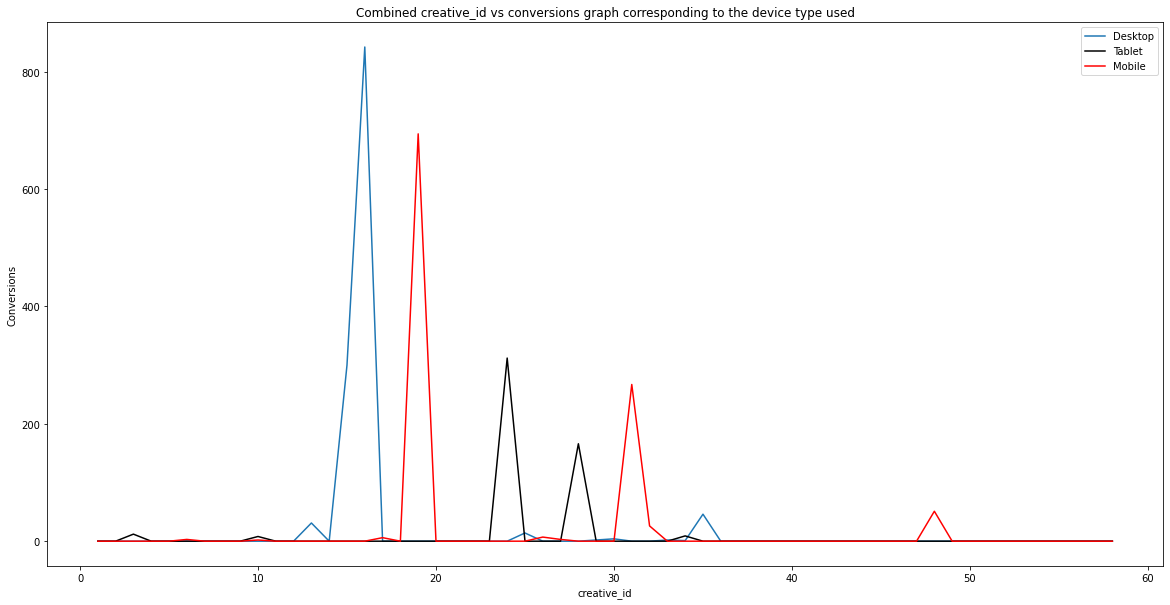

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.plot(conv_vs_creative_Desktop_df['creative_id'], conv_vs_creative_Desktop_df['conversions'] , label = 'Desktop')
plt.plot(conv_vs_creative_Tablet_df['creative_id'], conv_vs_creative_Tablet_df['conversions'] , label = 'Tablet', color ='black')
plt.plot(conv_vs_creative_Mobile_df['creative_id'], conv_vs_creative_Mobile_df['conversions'] , label = 'Mobile',color = 'red')
plt.title('Combined creative_id vs conversions graph corresponding to the device type used' )
plt.xlabel('creative_id')
plt.ylabel('Conversions')
plt.legend()

WE CAN USE THE ABOVE GRAPH IF WE NEED SIMULTANEOUS COMPARISON OF CREATIVE ID'S FOR EACH DEVICES WITH RESPECT TO NUMBER OF  CONVERSIONS.

#Let's visualize conversions vs ad_unit_id for each type of devices.

#Firstly define a function first that takes Type of device as argument.

In [ ]:
def Conversions_ad_unit_id(device):
  df_conversions_ad_unit_id = []
  for ad_unit_id in df['ad_unit_id'].unique():
    rows = df[(df['ad_unit_id'] == ad_unit_id) & (df['device'] == device)]
    c = rows['conversions'].sum()
    df_conversions_ad_unit_id.append([ad_unit_id,c])
  df_conversions_ad_unit_id = pd.DataFrame(df_conversions_ad_unit_id, columns=['ad_unit_id', 'conversions'])
  df_conversions_ad_unit_id = df_conversions_ad_unit_id[df_conversions_ad_unit_id.ad_unit_id != 'Organic']
  df_conversions_ad_unit_id = df_conversions_ad_unit_id.sort_values(by=['ad_unit_id'])
  plt.figure()
  df_conversions_ad_unit_id.plot(x = 'ad_unit_id', y = 'conversions', figsize = (20,8) ,title = 'Conversions Vs ad_unit_id when device type used were = '+str(device))
  plt.ylabel('Conversions')
  return df_conversions_ad_unit_id

 1. **Conversions vs ad_unit_id when Desktop devices were used**




<Figure size 432x288 with 0 Axes>

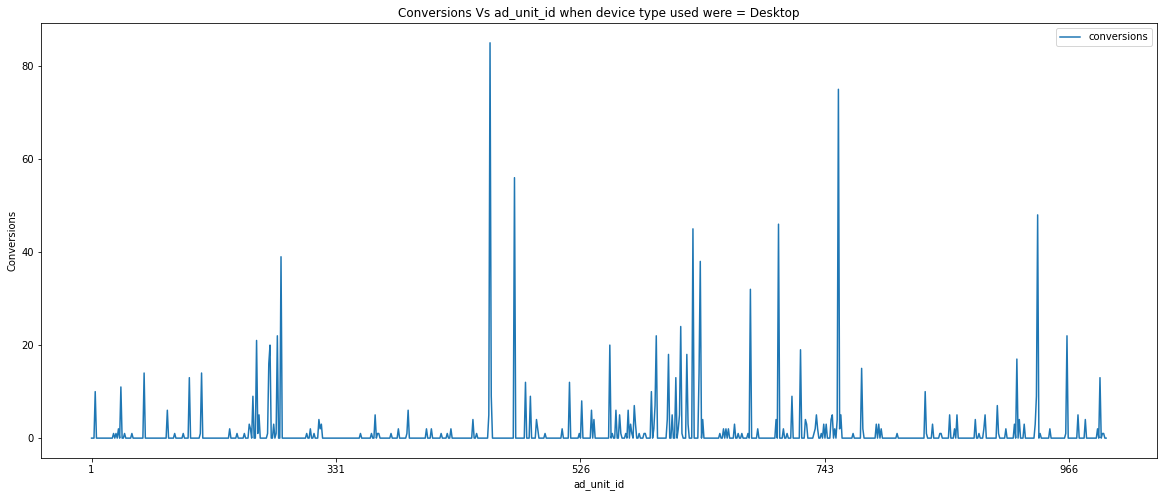

In [ ]:
Desktop_conversions_vs_ad_obj = Conversions_ad_unit_id('Desktop') #Function call

**Let's split the ad_unit_id into two parts visualize more clearly below:**

*Note: For the more precise view we can either view the graph in a larger screen or split ad_unit_id in more number of parts.*


**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_conv_ad(device_conversions_vs_ad_obj):
    # Creating a new data frame
    device_conversions_vs_ad_obj= device_conversions_vs_ad_obj[(device_conversions_vs_ad_obj['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ad_obj.plot(x = 'ad_unit_id', y = 'conversions', figsize = (20,10), title = 'COnversions Vs ad_unit_id(more than 600)')
    plt.ylabel('Conversions')

**Let's define another function that plots graph for ad_unit_id less than 600**

In [ ]:
def less_than_600_conv_ad(device_conversions_vs_ad_obj):
    # Creating a new data frame
    device_conversions_vs_ad_obj= device_conversions_vs_ad_obj[(device_conversions_vs_ad_obj['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ad_obj.plot(x = 'ad_unit_id', y = 'conversions', figsize = (20,10), title = 'COnversions Vs ad_unit_id(less than 600)')
    plt.ylabel('Conversions')

1.1 **When ad_unit_id is more than 600.**

<Figure size 432x288 with 0 Axes>

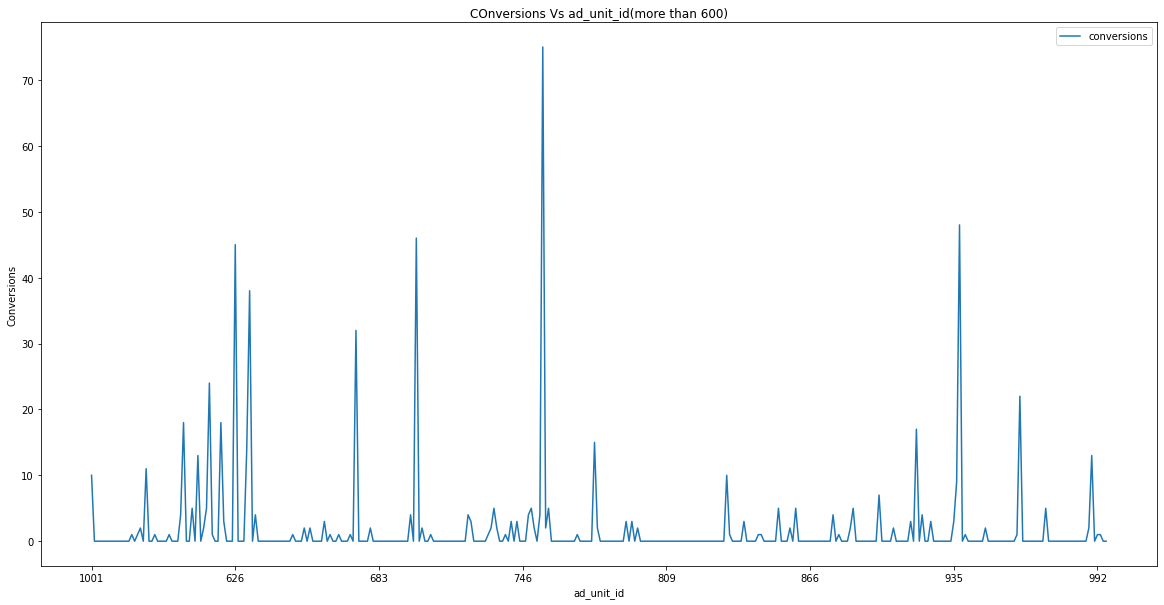

In [ ]:
more_than_600_conv_ad(Desktop_conversions_vs_ad_obj)

We can see that ad unit id around 626, 746 and 935 have large contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which doesn't have any contribution at all, from the above graph. 

1.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

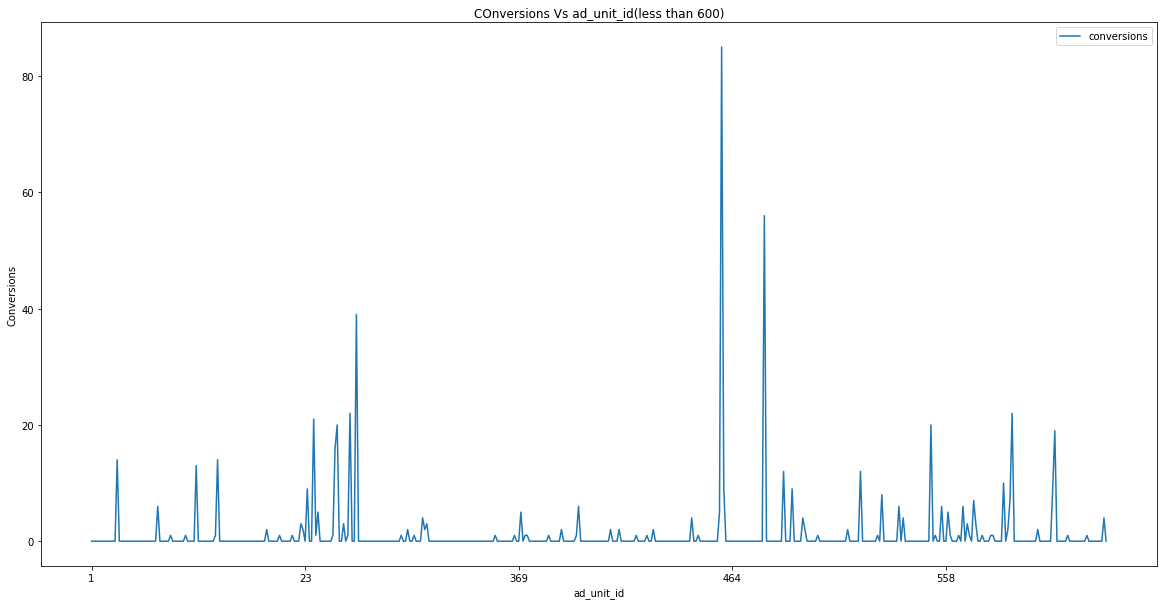

In [ ]:
less_than_600_conv_ad(Desktop_conversions_vs_ad_obj)

We can see that ad unit id around 23, 464, 558 626 have large contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which doesn't have any contribution at all, from the above graph. 

 2. **Conversions vs ad_unit_id when Mobile devices were used**


<Figure size 432x288 with 0 Axes>

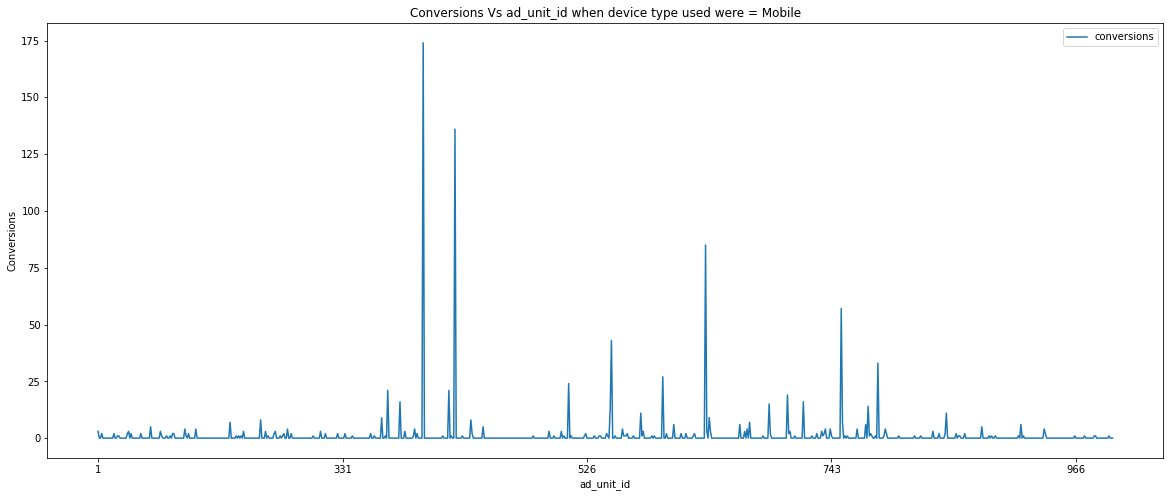

In [ ]:
Mobile_conversions_vs_ad_obj = Conversions_ad_unit_id('Mobile') #Function call

**Let's visualize more clearly below.**


2.1 **When the ad unit id is more than 600**

<Figure size 432x288 with 0 Axes>

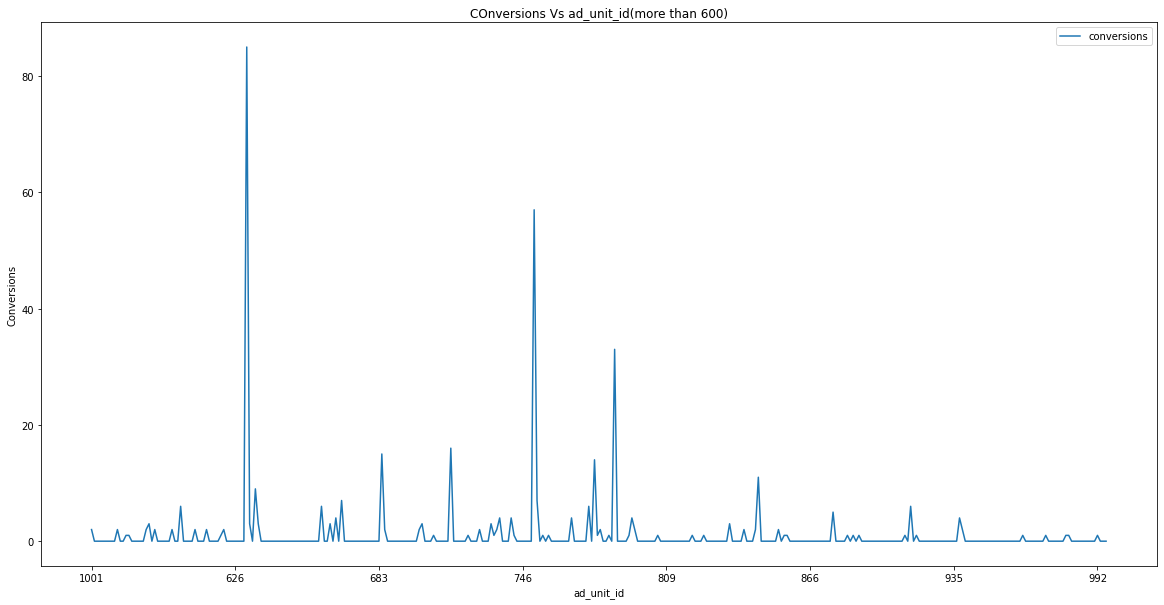

In [ ]:
# Creating a new data frame
more_than_600_conv_ad(Mobile_conversions_vs_ad_obj)

We can see that ad unit id around 626 and between ( 746, 800 ) have large contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph. 

2.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

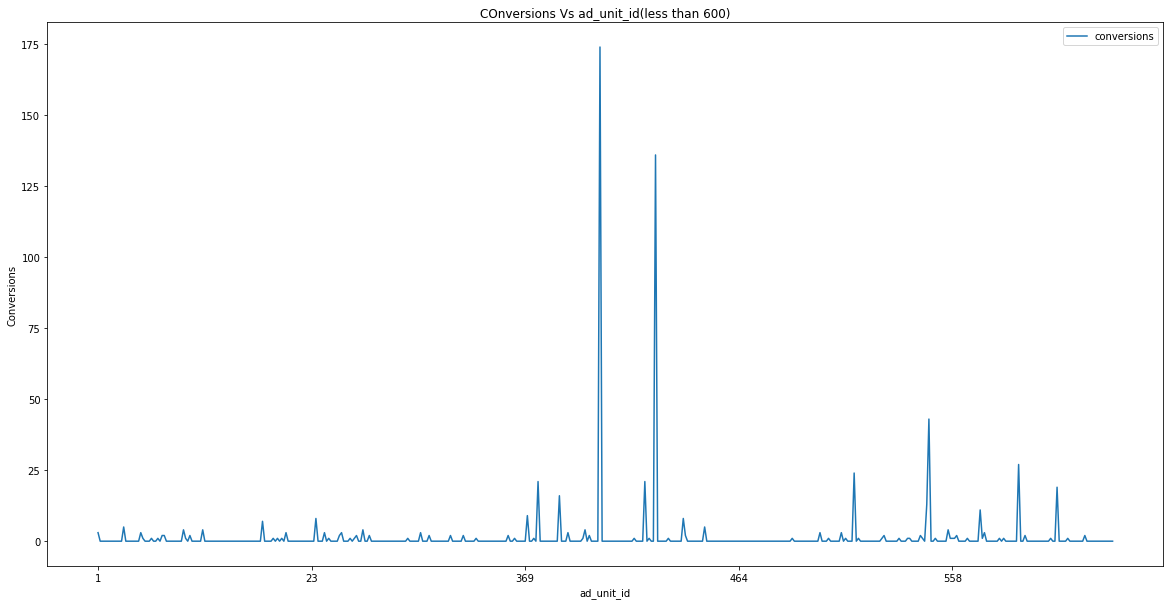

In [ ]:
less_than_600_conv_ad(Mobile_conversions_vs_ad_obj)

We can see that ad unit id around 370, 400, 550 have more contribution in conversions for Mobile Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph.

 3. **Conversions vs ad_unit_id when Tablet devices were used**


<Figure size 432x288 with 0 Axes>

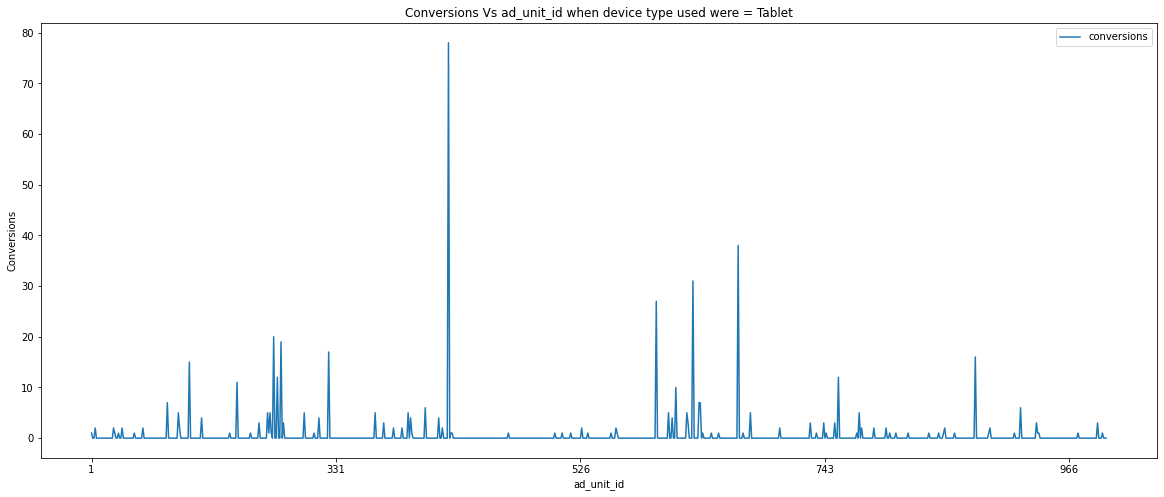

In [ ]:
Tablet_conversions_vs_ad_obj = Conversions_ad_unit_id('Tablet') #Function call

**Let's split ad_unit_id into two parts and visualize more clearly below:**


3.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

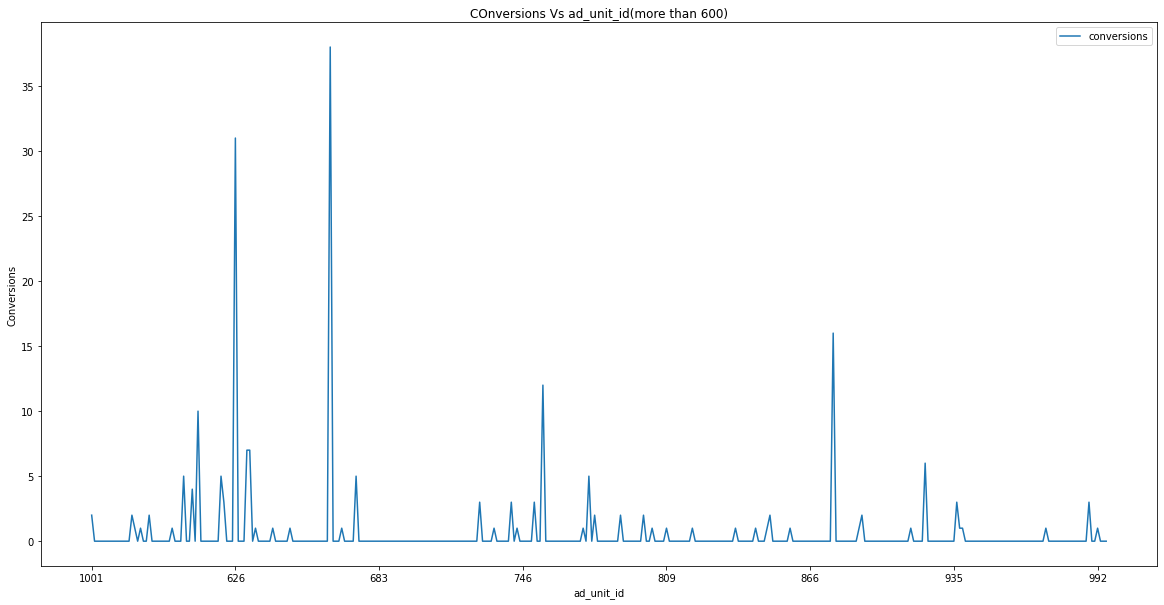

In [ ]:
more_than_600_conv_ad(Tablet_conversions_vs_ad_obj)

We can see that ad unit id around 626, 746, 935 have more contribution in conversions for Tablet Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph.

3.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

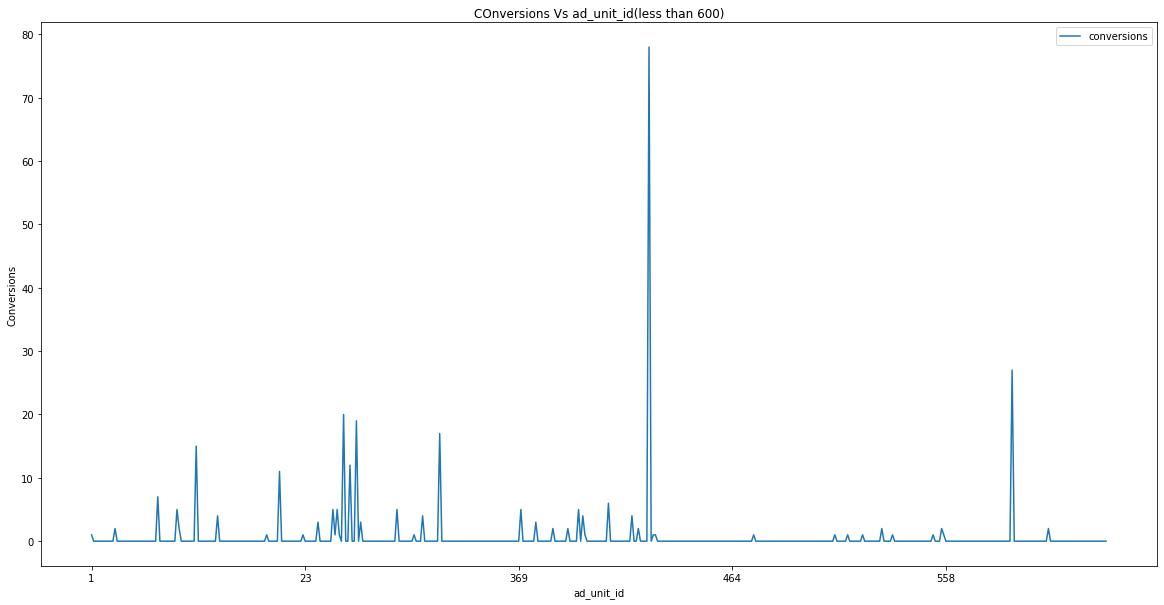

In [ ]:
less_than_600_conv_ad(Tablet_conversions_vs_ad_obj)

We can see that ad unit id around 30, 400, 600 have more contribution in conversions for Tablet Devices users. I recommend using those ad_unit_id's to boost up the revenue. I also recommend to filter the ad_unit_id which don't have any contribution at all from the above graph.

#Let's visualize ad_unit_id and referrals according to the device type used.

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Referrals_ad_unit_id(device):
  df_Referrals_ad_unit_id = []
  for ad_unit_id in df['ad_unit_id'].unique():
    rows = df[(df['ad_unit_id'] == ad_unit_id) & (df['device'] == device)]
    c = rows['referrals'].sum()
    df_Referrals_ad_unit_id.append([ad_unit_id,c])
  df_Referrals_ad_unit_id = pd.DataFrame(df_Referrals_ad_unit_id, columns=['ad_unit_id', 'Referrals'])
  df_Referrals_ad_unit_id = df_Referrals_ad_unit_id[df_Referrals_ad_unit_id.ad_unit_id != 'Organic']
  df_Referrals_ad_unit_id = df_Referrals_ad_unit_id.sort_values(by=['ad_unit_id'])
 # Visualization
  plt.figure()
  df_Referrals_ad_unit_id.plot(x = 'ad_unit_id', y = 'Referrals', figsize = (20,10), title = 'Referrals Vs ad_unit_id(more than 600) when devices used were :'+str(device))
  plt.ylabel('Referrals')
  return df_Referrals_ad_unit_id

**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_ref_ad(device_conversions_vs_ref_obj):
    # Creating a new data frame
    device_conversions_vs_ref_obj= device_conversions_vs_ref_obj[(device_conversions_vs_ref_obj['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ref_obj.plot(x = 'ad_unit_id', y = 'Referrals', figsize = (20,10), title = 'Referrals Vs ad_unit_id(more than 600)')
    plt.ylabel('Conversions')

**Let's define another function that plots graph for ad_unit_id less than 600**

In [ ]:
def less_than_600_ref_ad(device_conversions_vs_ref_obj):
    # Creating a new data frame
    device_conversions_vs_ref_obj= device_conversions_vs_ref_obj[(device_conversions_vs_ref_obj['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_conversions_vs_ref_obj.plot(x = 'ad_unit_id', y = 'Referrals', figsize = (20,10), title = 'Referrals Vs ad_unit_id(less than 600)')
    plt.ylabel('Conversions')

 1. **Referrals vs ad_unit_id when Desktop devices were used**


<Figure size 432x288 with 0 Axes>

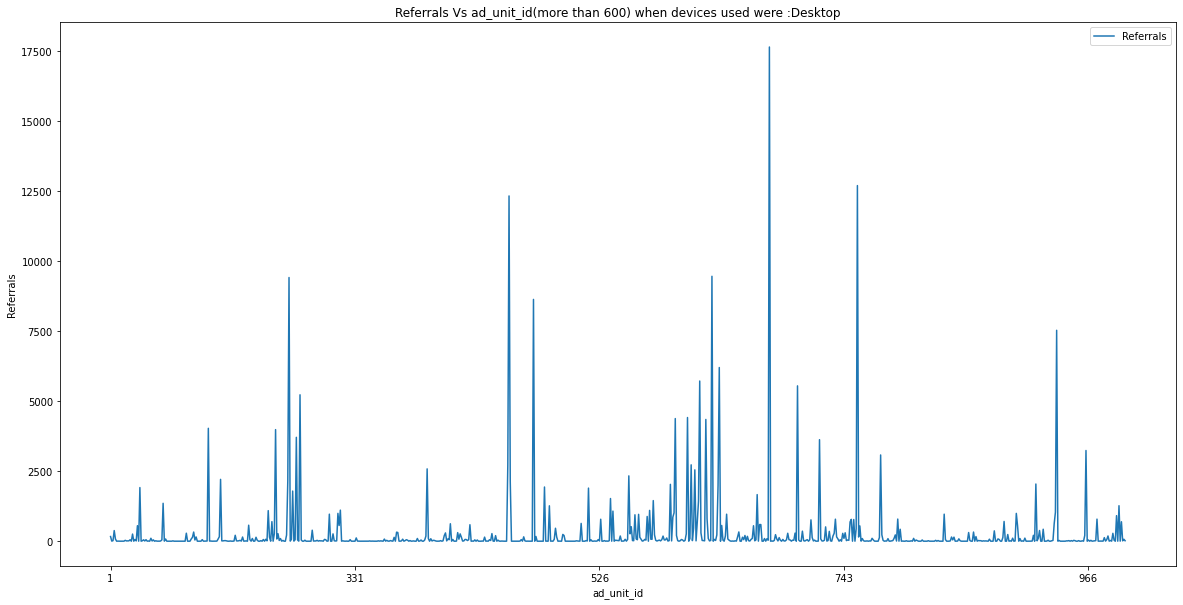

In [ ]:
Referrals_ad_unit_Desktop_obj = Referrals_ad_unit_id('Desktop')

**Let's visualize more clearly below splitting ad_unit_id into two parts:**

1.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

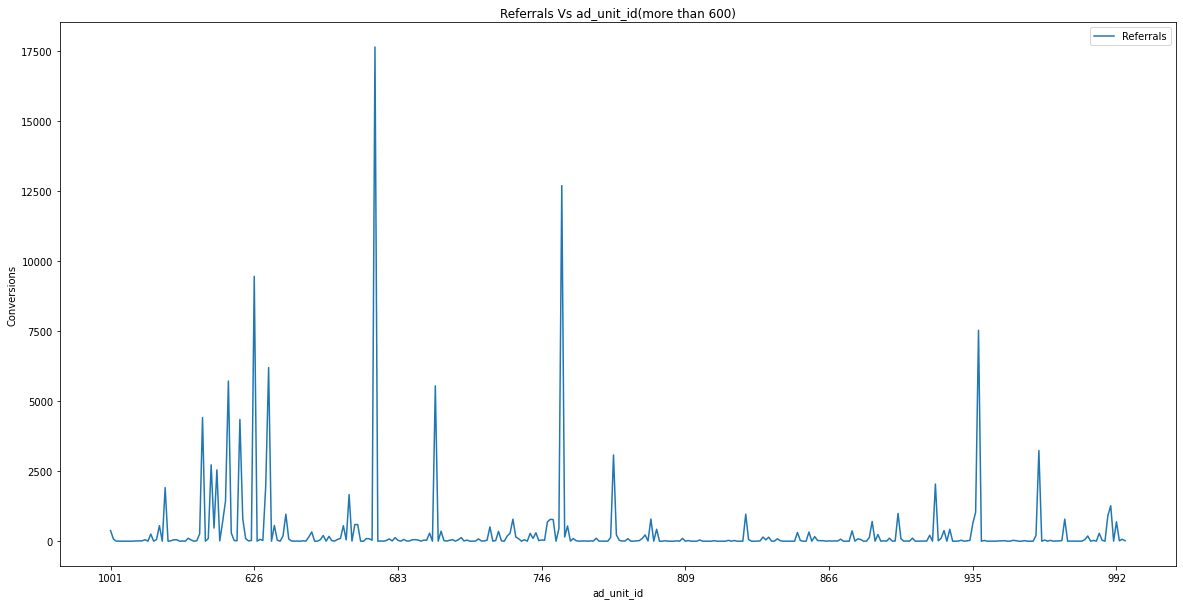

In [ ]:
more_than_600_ref_ad(Referrals_ad_unit_Desktop_obj)

We can see that ad unit id around 600,626 750 have large contribution in referrals for Desktop Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

1.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

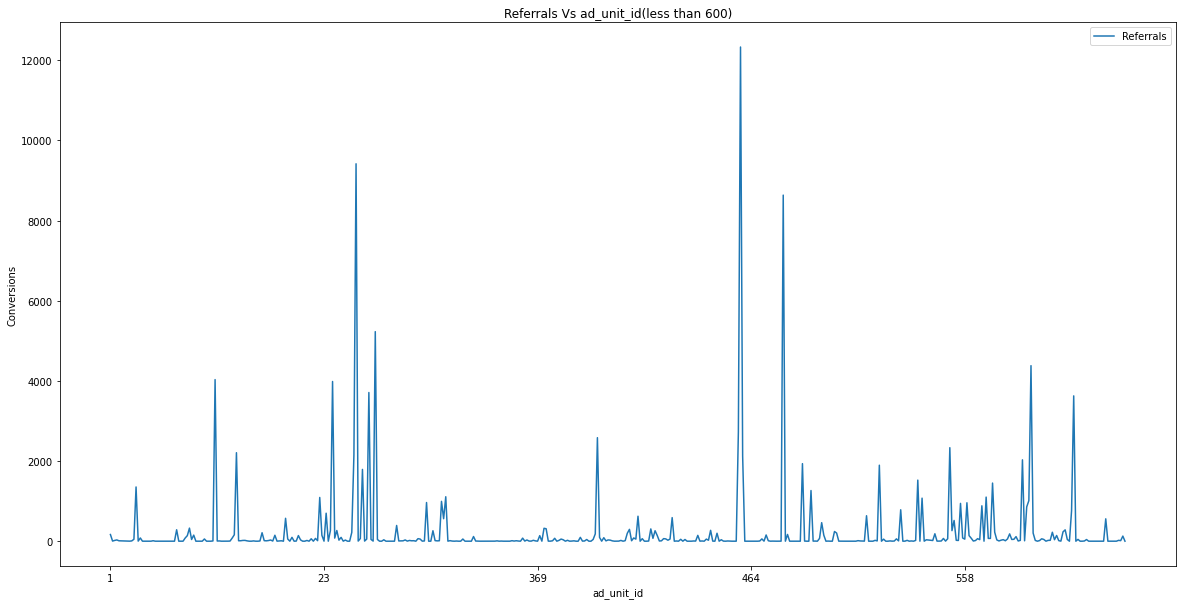

In [ ]:
less_than_600_ref_ad(Referrals_ad_unit_Desktop_obj)

We can see that ad unit id around 23, 30, 460 to 558 have large contribution in referrals for Desktop Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

 2. **Referrals vs ad_unit_id when Mobile devices were used**


<Figure size 432x288 with 0 Axes>

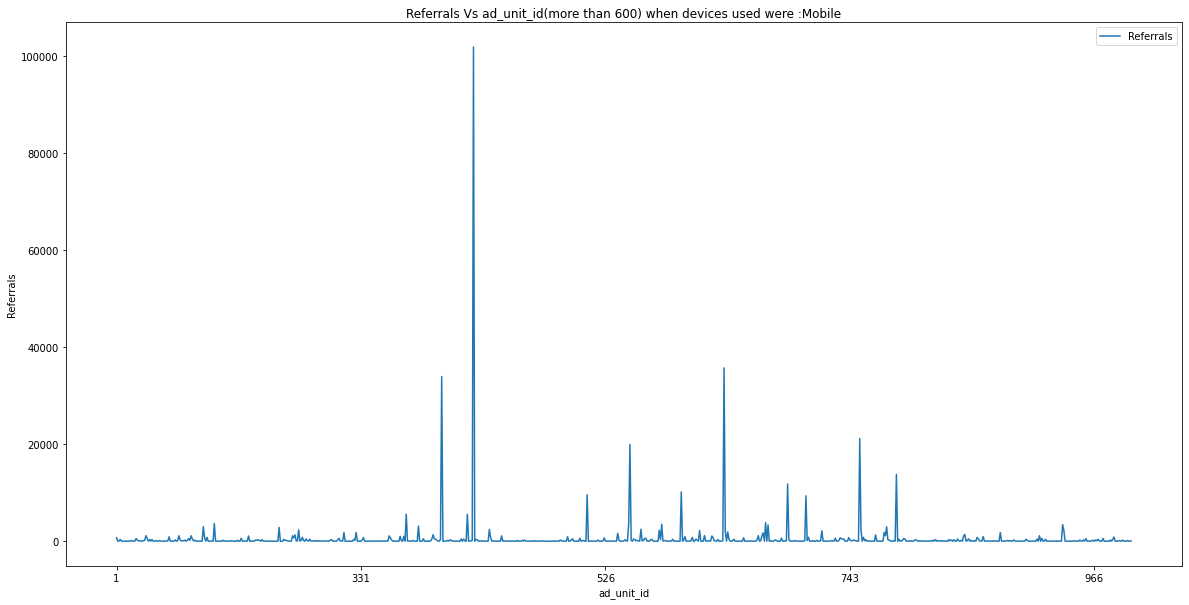

In [ ]:
Referrals_ad_unit_Mobile_obj = Referrals_ad_unit_id('Mobile')

**Let's split the ad_unit_id into two parts and visualize more clearly below:**

2.1 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

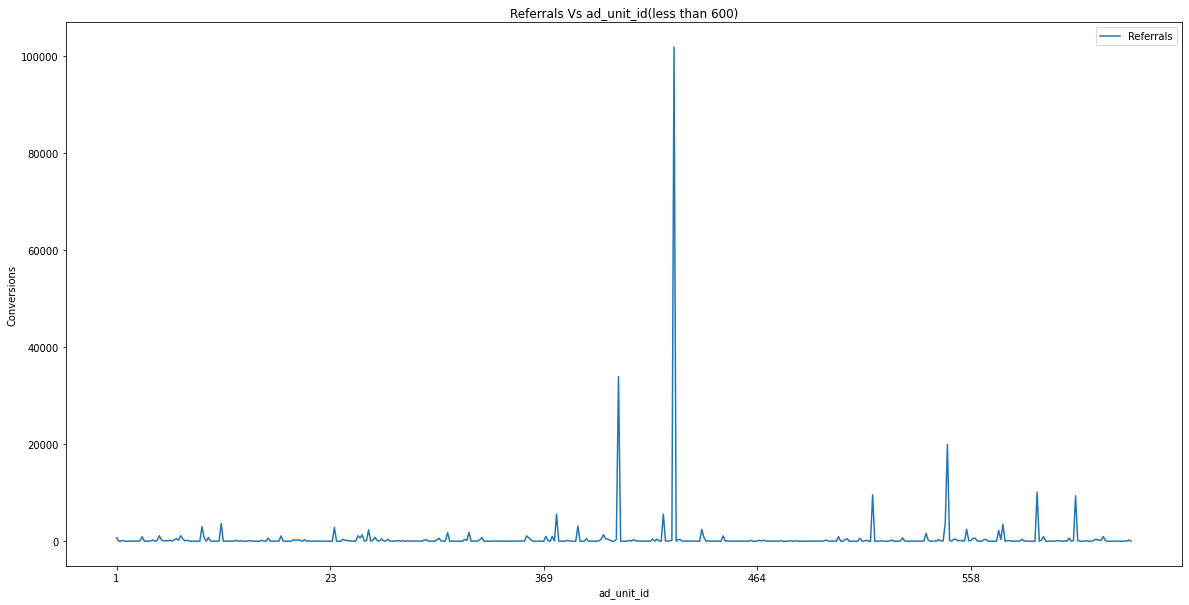

In [ ]:
less_than_600_ref_ad(Referrals_ad_unit_Mobile_obj)

We can see that ad unit id around 626, 650 and 875 have large contribution in referrals for Mobile Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

2.2 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

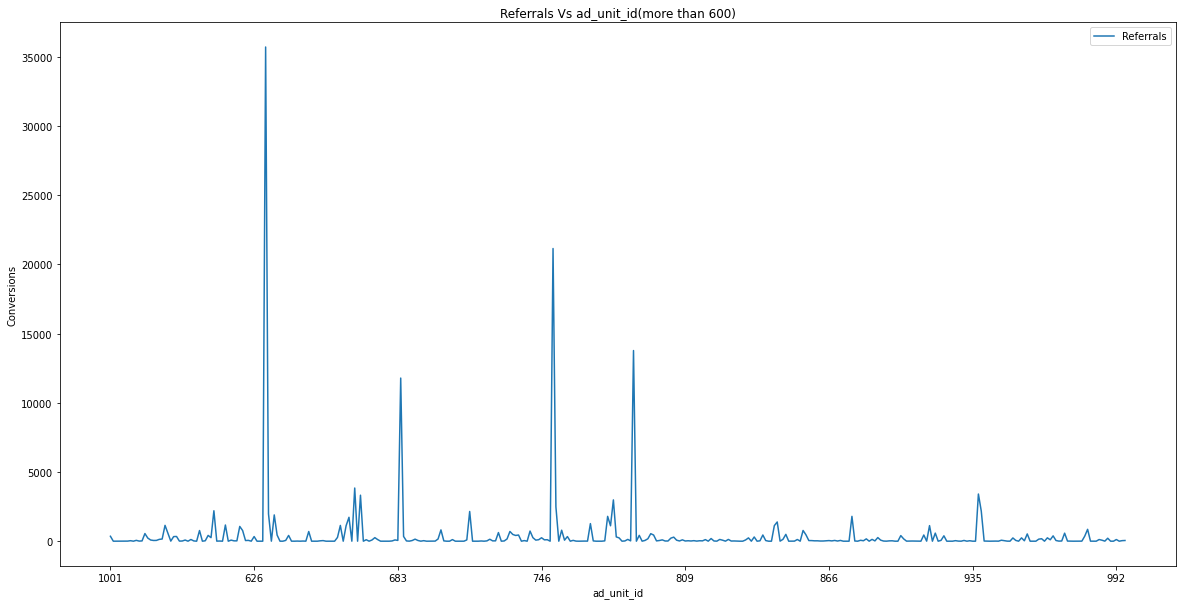

In [ ]:
more_than_600_ref_ad(Referrals_ad_unit_Mobile_obj)

We can see that ad unit id around 400 have large contribution in referrals for Mobile Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

 3. **Referrals vs ad_unit_id when Tablet devices were used**


<Figure size 432x288 with 0 Axes>

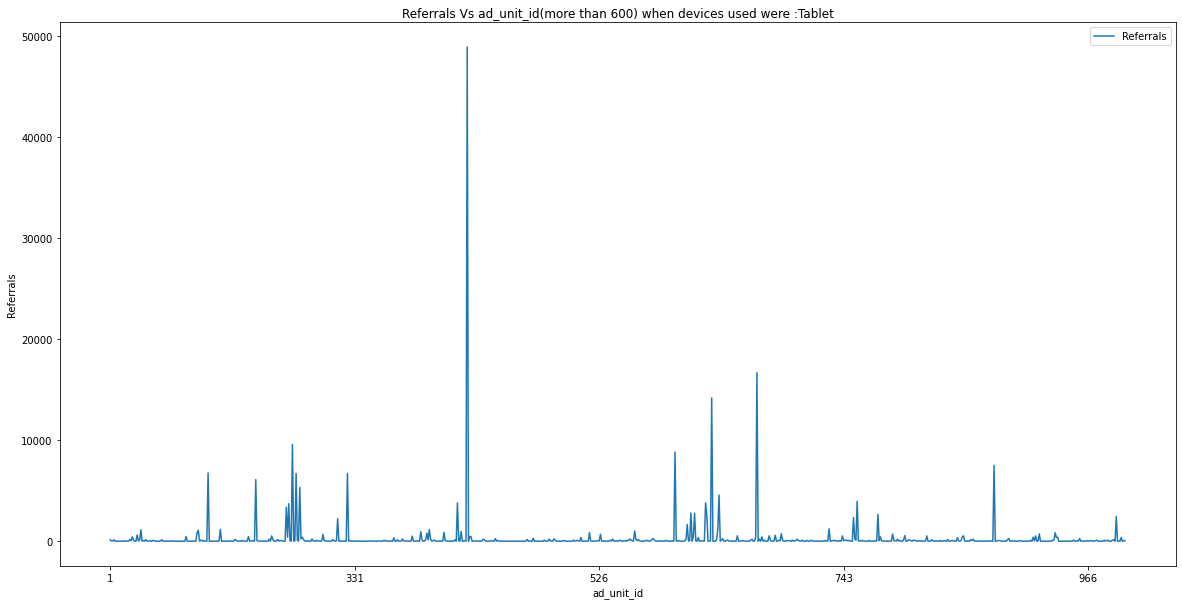

In [ ]:
Referrals_ad_unit_Tablet_obj = Referrals_ad_unit_id('Tablet')

**Let's split the ad_unit_id into two parts and visualize more clearly**

3.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

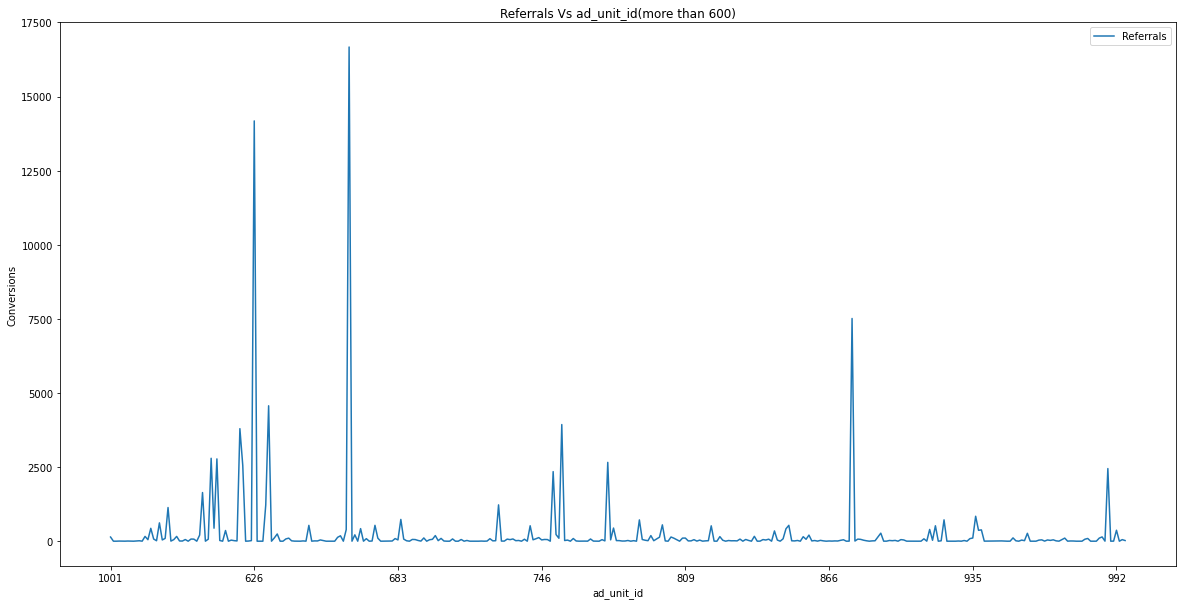

In [ ]:
more_than_600_ref_ad(Referrals_ad_unit_Tablet_obj)

We can see that ad unit id around 626 have large contribution in referrals for Tablet Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

3.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

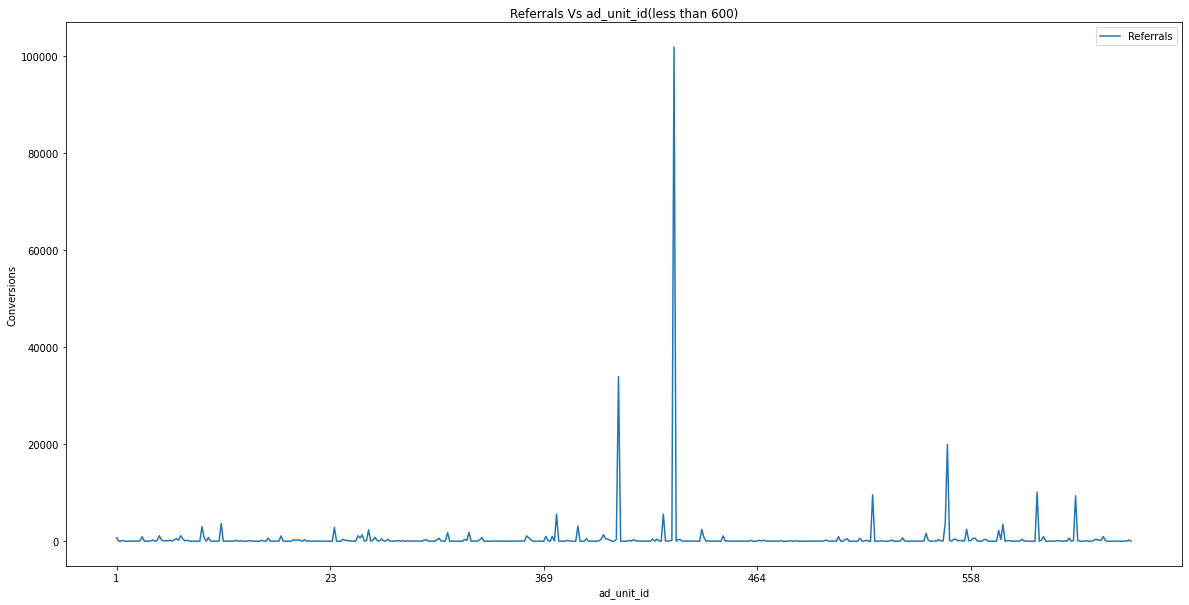

In [ ]:
less_than_600_ref_ad(Referrals_ad_unit_Mobile_obj)

We can see that ad unit id around 400 have large contribution in referrals for Tablet Devices users. I recommend using those ad_unit_id's to boost up the 
referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

 4. **Referrals vs ad_unit_id when Other devices were used**


<Figure size 432x288 with 0 Axes>

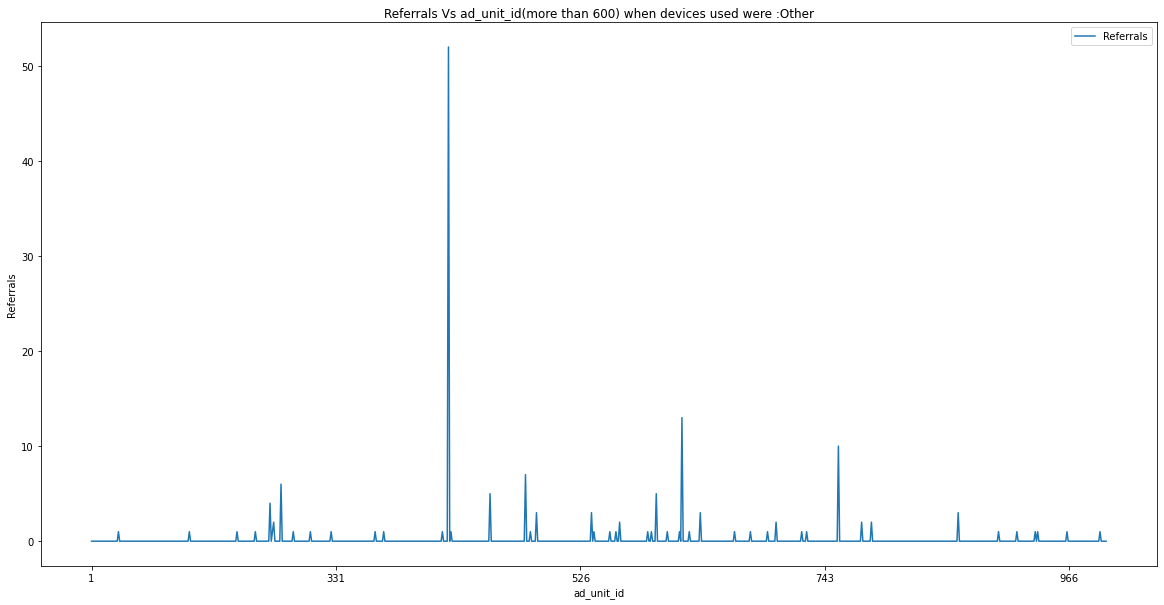

In [ ]:
Referrals_ad_unit_Other_obj = Referrals_ad_unit_id('Other')

**Let's split ad_unit_id into two parts visualize more clearly below:**

4.1 **When ad_unit_id is more than 600**

<Figure size 432x288 with 0 Axes>

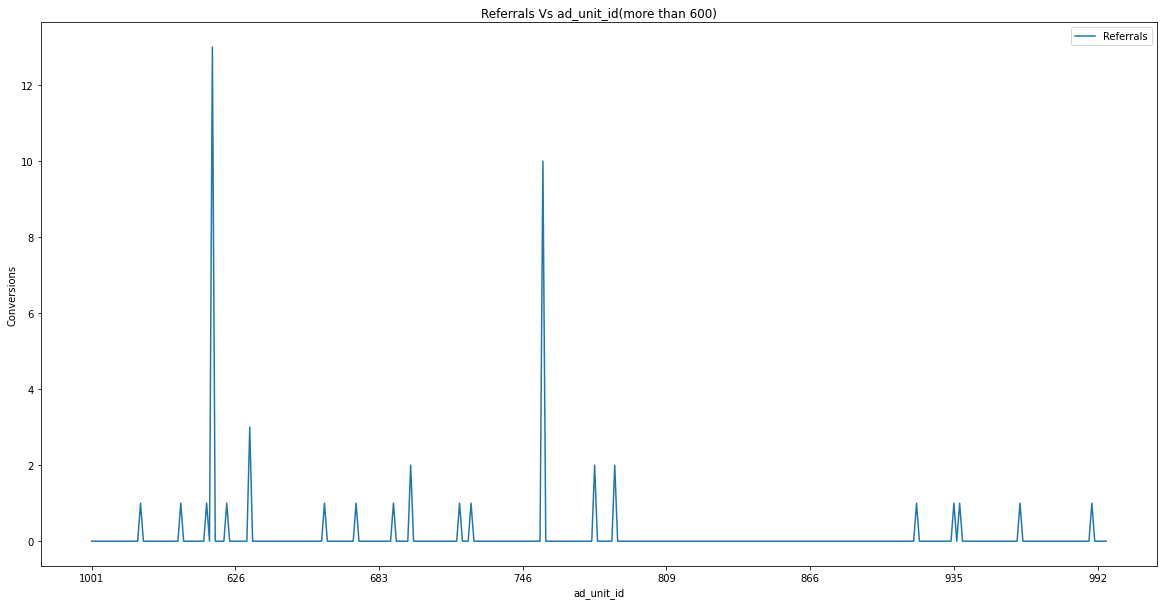

In [ ]:
more_than_600_ref_ad(Referrals_ad_unit_Other_obj)

We can see that ad unit id around 600 and 750 have large contribution in referrals for Other Devices users. I recommend using those ad_unit_id's to boost up the referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

4.2 **When ad_unit_id is less than 600**

<Figure size 432x288 with 0 Axes>

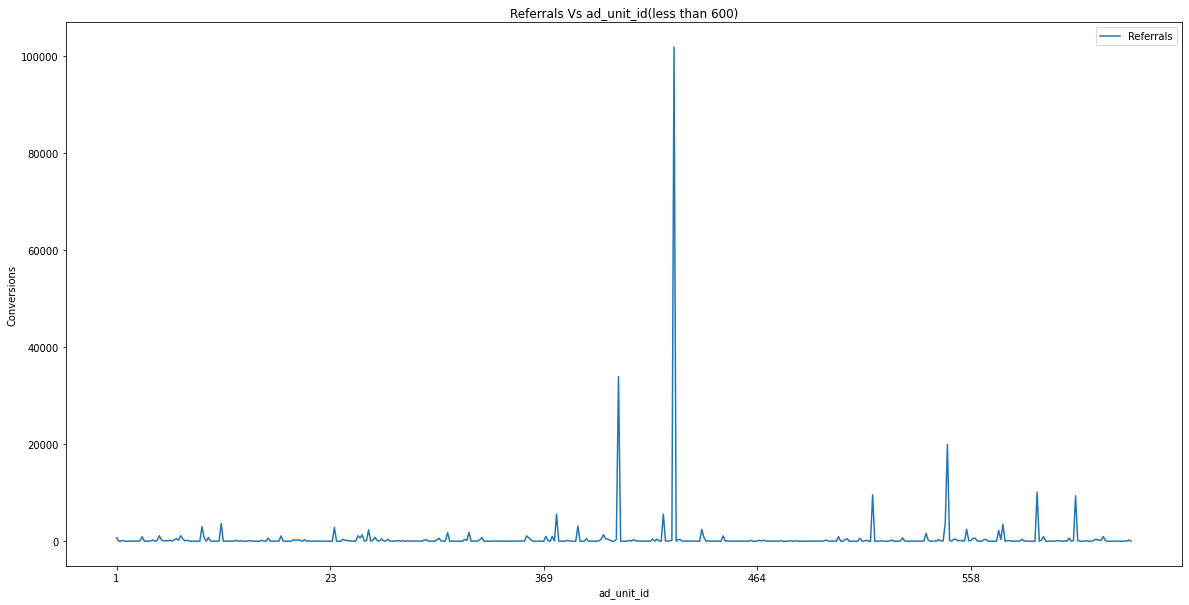

In [ ]:
less_than_600_ref_ad(Referrals_ad_unit_Mobile_obj)

We can see that ad unit id around 400 have large contribution in referrals for Other Devices users. I recommend using those ad_unit_id's to boost up the referral rate. I also recommend to filter the ad_unit_id which don't have any contribution in referrals at all from the above graph. 

# Let's visualize Conversions, Referrals and Impressions according to the date.

         Date  Action Type  Frequency  log(Frequency)
0  2018-01-01  conversions         62        1.792392
1  2018-01-01  impressions    1824155        6.261062
2  2018-01-01    referrals      17197        4.235453
3  2018-01-02  conversions         55        1.740363
4  2018-01-02  impressions    1517352        6.181086
..        ...          ...        ...             ...
88 2018-01-30  impressions    3958899        6.597574
89 2018-01-30    referrals      44915        4.652391
90 2018-01-31  conversions        118        2.071882
91 2018-01-31  impressions    4166122        6.619732
92 2018-01-31    referrals      49580        4.695307

[93 rows x 4 columns]


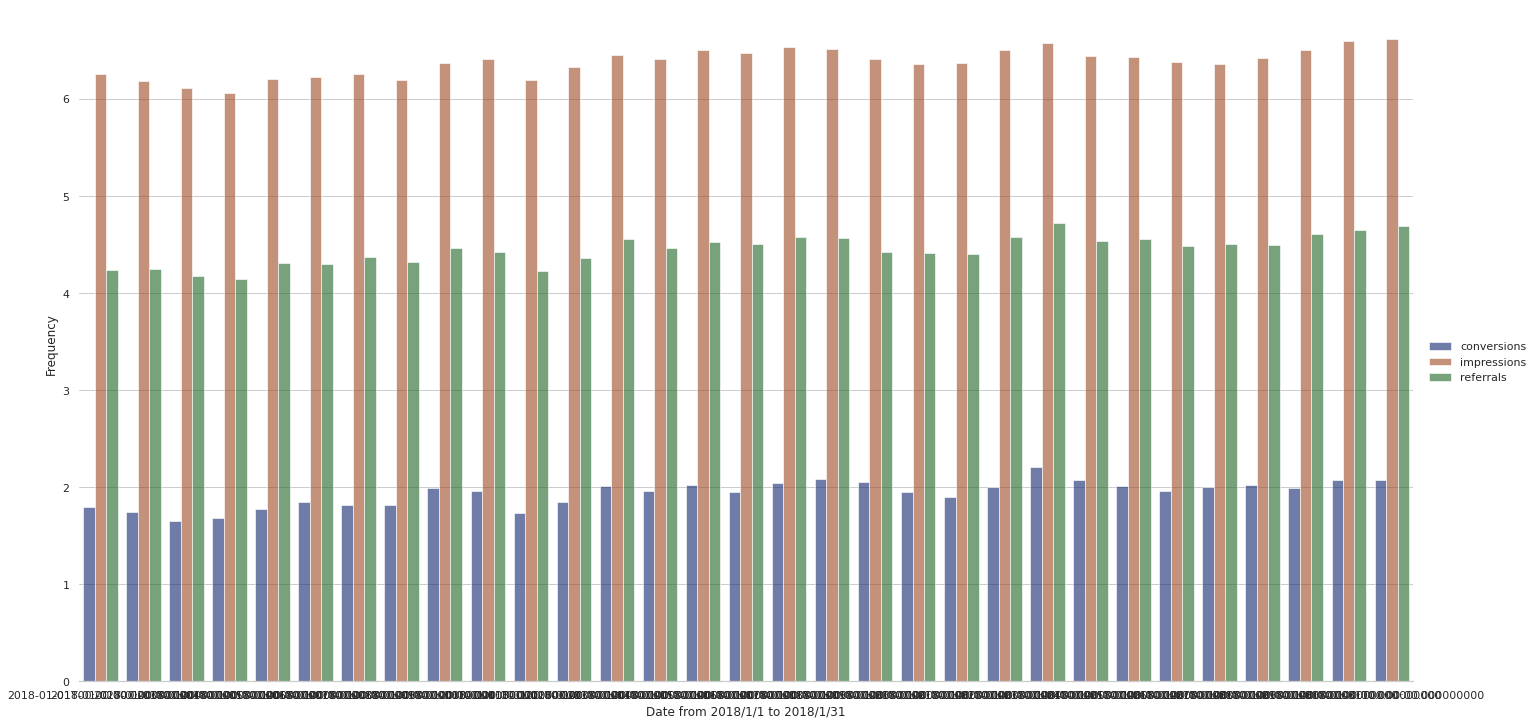

In [ ]:
# Creation of new DataFrame
new_df_rows1 = []
for date in df['date'].unique():
  rows = df[df['date'] == date]
  total_conversions = rows['conversions'].sum()
  total_impressions = rows['impressions'].sum()
  total_referrals  = rows['referrals'].sum()
  new_df_rows1.append([date,'conversions',total_conversions])
  new_df_rows1.append([date,'impressions',total_impressions])
  new_df_rows1.append([date,'referrals',total_referrals])

# Normalization of frequency, using logarithmic function, for clear visibility of graph 
new_df1 = pd.DataFrame(new_df_rows1, columns=['Date', 'Action Type', 'Frequency'])
new_df1['log(Frequency)'] = np.log10(new_df1['Frequency'])
print(new_df1)

# Visualization
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=new_df1, kind="bar",
    x="Date", y="log(Frequency)", hue="Action Type",
    ci="sd", palette="dark", alpha=.6, height=10, aspect = 2
)
g.despine(left=True)
g.set_axis_labels("Date from 2018/1/1 to 2018/1/31", "Frequency")
g.legend.set_title("")

WE CAN USE THE ABOVE GRAPH FOR VISUALIZATION OF NUMBER OF CONVERSIONS, IMPRESSIONS AND REFERRALS WITH RESPECT TO EACH DATES.

#SET OF METRICS

#CONVERSION RATE PER REFERRAL(CRR)



How many ad visitors were actually converted?

**Conversion rate per referral(CRR) = (Total Conversions / Total referrals) * 100%**

In [ ]:
CRR = (df['conversions'].sum() / df['referrals'].sum()*100)
print('The conversion rate  = ',CRR, '%')

The conversion rate  =  0.30633484755259405 %


Out of 1000 ad visitors,  about 3 of them were converted.

#CONVERSION RATE PER IMPRESSION(CVR)



HOW MANY IMPRESSIONS WERE ACTUALLY CONVERTED?

**Conversion rate per 1000 impressions ( CVRI ) = ( Total Conversions / Total impressions )  * 1000**




In [ ]:
CVRI = (df['conversions'].sum() / df['impressions'].sum())*1000
print('Conversion rate per 1000 impressions is = ', CVRI)

Conversion rate per 1000 impressions is =  0.03607422132290182


#REFERRAL RATE PER IMPRESSION (RRI)

HOW MANY IMPRESSIONS WERE CLICKED AND THE AD WAS VISITED BY THE USER?


**Referral rate per 1000 impressions ( RRI ) = ( Total referrals / Total impressions ) * 1000**

In [ ]:
RRI = (df['referrals'].sum() / df['impressions'].sum())*1000
print('Referrals rate  per 1000 impressions  = ', RRI)

Referrals rate  per 1000 impressions  =  11.77607497518163


#COST PER MILE (CPM)

How much Company is paying publisher per 1,000 impressions?


**Cost Per Mile (CPM)  = ( publisher split / impressions ) * 1000**

In [ ]:
CPM = (df['publisher_split'] * 1000).divide(df['impressions'])
with pd.option_context('mode.use_inf_as_na', True):
  print('The average value of money Company is paying publisher per 1000 impressions is = $',CPM.dropna().mean())

The average value of money Company is paying publisher per 1000 impressions is = $ 1.3954772723960212


The average value of money Company is paying publisher per 1000 impressions is = $ 1.3954772723960212


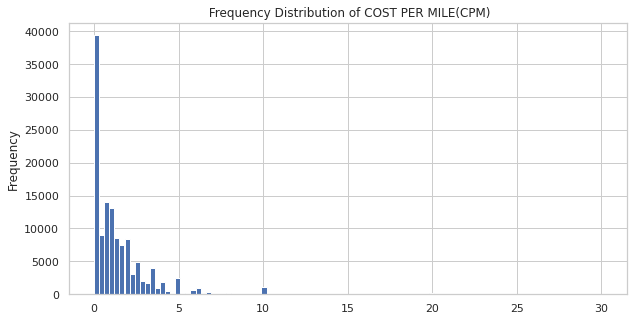

In [ ]:
# Visualization
CPM.dropna().plot.hist(bins=100,figsize = (10,5), title = ' Frequency Distribution of COST PER MILE(CPM)')

We can see the frequency of cost per mile is higher between 0 and 5.

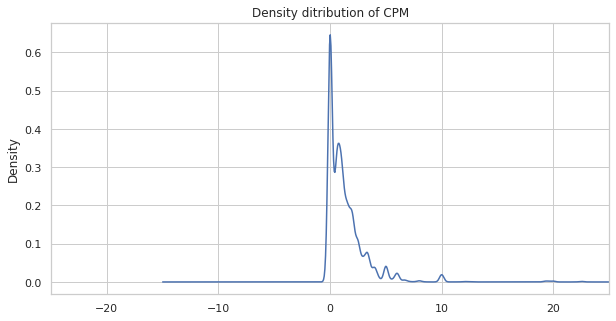

In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  CPM.dropna().plot.density(figsize = (10,5), xlim = (-25,25), title = 'Density ditribution of CPM')

# REVENUE PER MILE(RPM)

---



---



How much advertiser is paying company per 1000 impressions?

**Revenue Per Mile ( RPM ) = $ ( conversions / impressions ) *1000 *65 (as of 1/31)**

**Revenue Per Mile (RPM) = $ (conversions / impressions ) *1000 *60.50 ( through 1/30 )**

In [ ]:
# Creation of new Data Frame splitting the dates
on_jan31_df= df[(df['date'] == '2018-01-31')]
before_jan31_df= df[(df['date'] < '2018-01-31')]
RPM1 = (on_jan31_df['conversions']* 65*1000).divide(on_jan31_df['impressions'])
RPM2 = (before_jan31_df['conversions']* 60.50*1000).divide(before_jan31_df['impressions'])

# Concatenation
RPM = pd.concat([RPM2,RPM1])

In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  print('The average value of money advertiser is paying company per 1000 impressions is = $',RPM.dropna().mean())  

The average value of money advertiser is paying company per 1000 impressions is = $ 3.609273929443424


The average value of money advertiser is paying the company per 1000 impressions is = $ 3.609273929443424


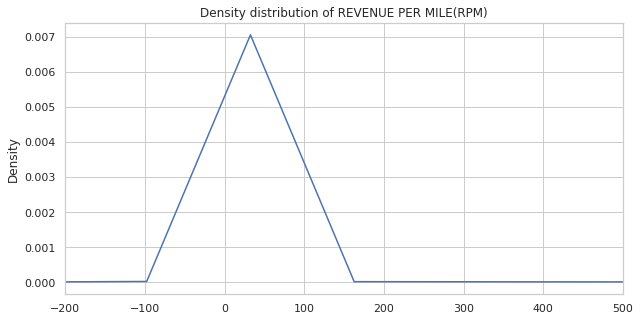

In [ ]:
# Visualization
with pd.option_context('mode.use_inf_as_na', True):
  RPM.dropna().plot.density(figsize = (10,5), xlim = (-200,500), title = 'Density distribution of REVENUE PER MILE(RPM)')


#PROFIT PER MILE(PPM)
Note : Staff and other operating expenses is not included



**PROFIT PER MILE (PPM) = REVENUE PER MILE (RPM) - COST PER MILE (CPM)**

In [ ]:
# Calculation
PPM = RPM - CPM
with pd.option_context('mode.use_inf_as_na', True): 
   print('The average value of PPM without including staff and other operating expenses is = $',PPM.dropna().mean())

The average value of PPM without including staff and other operating expenses is = $ 2.2137966570473373


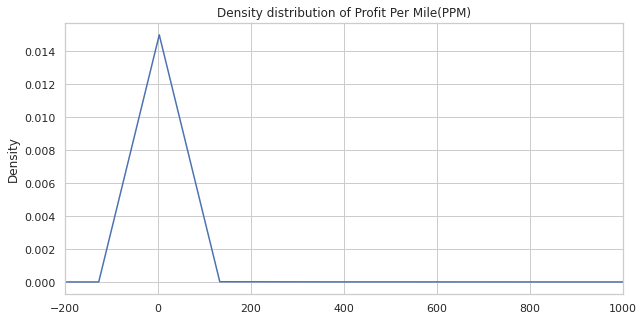

In [ ]:
#Visualization of PPM
with pd.option_context('mode.use_inf_as_na', True):
  PPM.dropna().plot.density(figsize = (10,5), xlim = (-200,1000), title ='Density distribution of Profit Per Mile(PPM)')

# Creating a new data table including PPM CPM and RPM

In [ ]:
# Creation of new data table
analysis_df = pd.concat([RPM,CPM,PPM],axis=1)
analysis_df.columns= ["RPM","CPM","PPM"]
with pd.option_context('mode.use_inf_as_na', True):
  print(analysis_df.dropna().describe())
merged_df = pd.concat([df,analysis_df], axis =1)
merged_df.dropna(0)

                 RPM            CPM            PPM
count  125481.000000  125481.000000  125481.000000
mean        3.609274       1.395477       2.213797
std       272.944717       2.020005     272.939825
min         0.000000       0.000000     -30.000000
25%         0.000000       0.000000      -1.904762
50%         0.000000       0.909091      -0.833333
75%         0.000000       1.979167       0.000000
max     65000.000000      30.000000   65000.000000


,date,device,creative_id,ad_unit_id,publisher_split,impressions,referrals,conversions,RPM,CPM,PPM
0,2018-01-01,Desktop,20,1,0.03,4,0,0,0.0,7.500000,-7.500000
1,2018-01-01,Desktop,25,1,0.06,7,1,0,0.0,8.571429,-8.571429
2,2018-01-01,Desktop,15,1,0.18,22,2,0,0.0,8.181818,-8.181818
3,2018-01-01,Desktop,13,1,0.22,27,1,0,0.0,8.148148,-8.148148
4,2018-01-01,Desktop,16,1,0.24,30,1,0,0.0,8.000000,-8.000000
...,...,...,...,...,...,...,...,...,...,...,...
128459,2018-01-31,Other,54,Organic,0.00,1,0,0,0.0,0.000000,0.000000
128470,2018-01-31,Other,12,Organic,0.00,1,0,0,0.0,0.000000,0.000000
128496,2018-01-31,Other,12,Organic,0.00,1,0,0,0.0,0.000000,0.000000
128509,2018-01-31,Tablet,28,Organic,0.00,205,0,0,0.0,0.000000,0.000000


**WHAT IS THE TOTAL COST OF THE COMPANY FOR THE WHOLE MONTH?** 


Note : Operating cost and other expenses are not included.

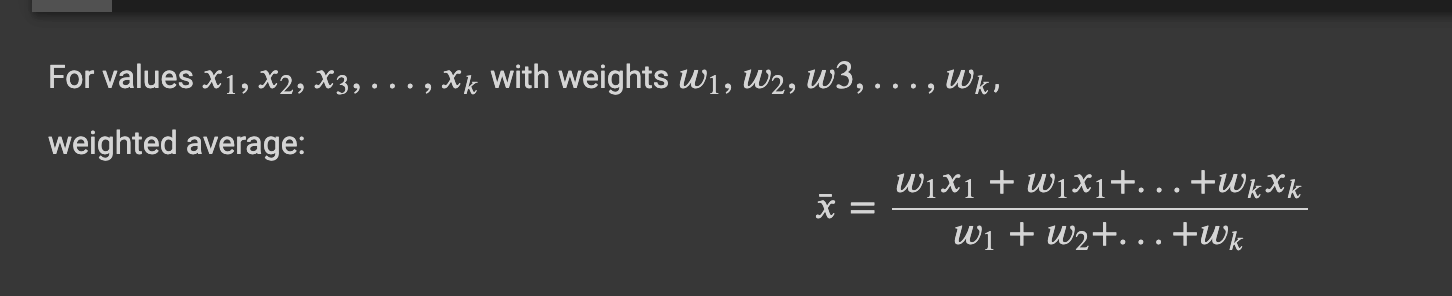

In [ ]:
weighted_sum_cost = (merged_df['CPM'].multiply(merged_df['impressions']/1000)).sum()
print(weighted_sum_cost)
weighted_average_cost = (weighted_sum_cost/((merged_df['impressions']/1000).sum()))
print(weighted_average_cost)

110469.93
1.4192011055361364


The total money paid by Company to Publisher for whole Month is (TOTAL COST) = $ 110469.93

The average cost per event (data point) is =  $ 1.41

**WHAT IS THE TOTAL REVENUE OF THE COMPANY FOR THE WHOLE MONTH?**

---




In [ ]:
weighted_sum_revenue = (merged_df['RPM'].multiply(merged_df['impressions']/1000)).sum()
print(weighted_sum_revenue)
weighted_average_revenue = (weighted_sum_revenue/((merged_df['impressions']/1000).sum()))
print(weighted_average_revenue)

170112.5
2.185425916948766


The total money advertiser is paying the company(Total Revenue) for whole month is = $ 170112.5

The average revenue per event is $ 2.18

**WHAT IS THE TOTAL PROFIT OF THE COMPANY FOR THE WHOLE MONTH?**


NOTE: Operating cost and other expenses are not included.

In [ ]:
weighted_sum_profit = (merged_df['PPM'].multiply(merged_df['impressions']/1000)).sum()
print(weighted_sum_profit)
weighted_average_profit = (weighted_sum_profit/((merged_df['impressions']/1000).sum()))
print(weighted_average_profit)

59642.57
0.7662248114126298


The total sum of profit earned by company(excluding operating cost and other expenses) for whole Month is = $ 59642.57

The average profit per event is = $ 0.76

#RPM Vs Dates Visualization

Text(0, 0.5, 'Revenue Per Mile')

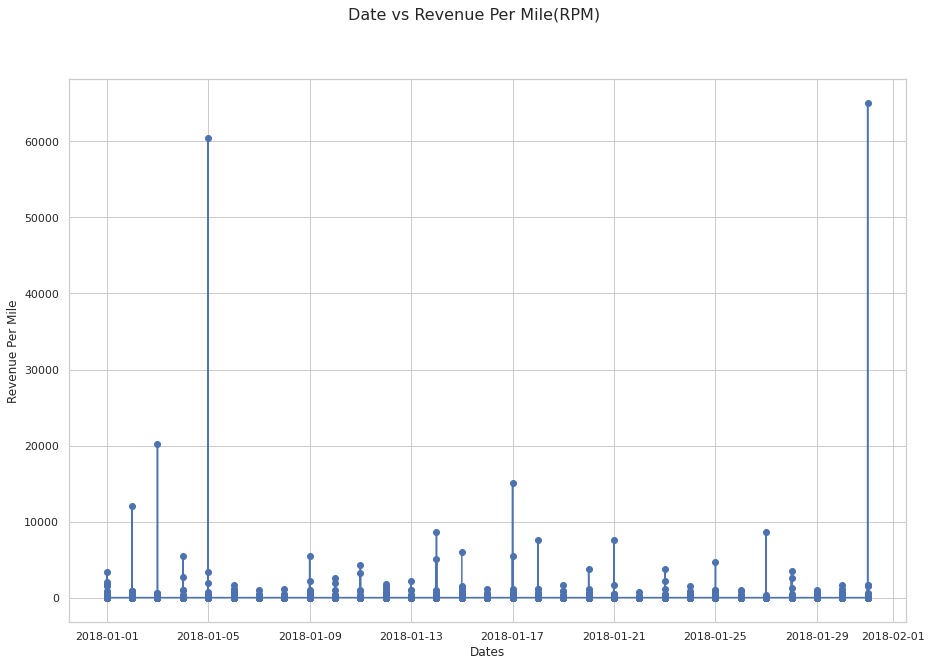

In [ ]:
# Visualization
plt.figure(figsize=(15,10))
dates = matplotlib.dates.date2num(df['date'])
plt.plot_date(merged_df['date'], merged_df['RPM'], linestyle = '-')
pl.suptitle('Date vs Revenue Per Mile(RPM)', fontsize=16)
pl.xlabel('Dates')
pl.ylabel('Revenue Per Mile')


From the above graph we can see that 5th and 31th of the month has highest amount of Revenue Per Mile.

# PPM vs Impressions Graph

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 30000.0)

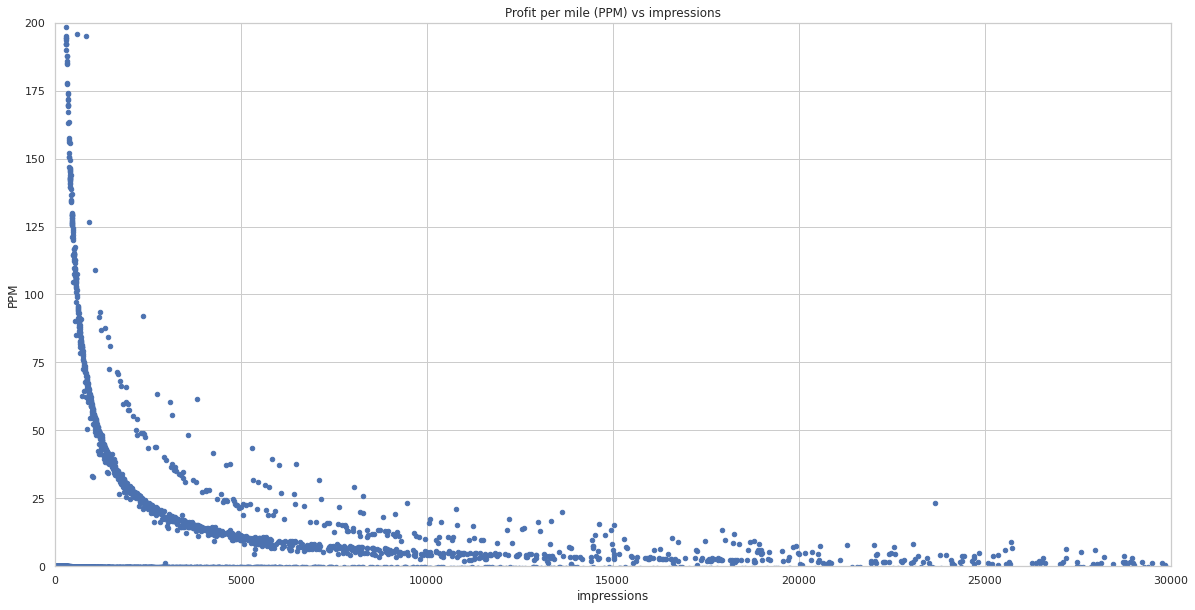

In [ ]:
# Visualization
merged_df.plot(kind = 'scatter',x = 'impressions' , y = 'PPM', figsize = (20,10) , title = 'Profit per mile (PPM) vs impressions')
plt.ylim(0,200)
plt.xlim(0,30000)

As the number of impressions is increasing the PPM is decreasing. This shows that they are negatively correlated. This is due to the reason that less amount of impressions are being converted and which is decreasing revenue and increasing the cost. We need to optimize the impressions to increase revenue.

#Let's plot Profit VS creative_id graph according to device type used

**Let's define a function first**

In [ ]:
def Creative_id_profit(device):
  df_Creative_id_profit = [] #Creating a new data frame
  for creative_id in merged_df['creative_id'].unique():
    rows = merged_df[(merged_df['creative_id'] == creative_id) & (merged_df['device'] == device)]
    c = (rows['PPM'].multiply(rows['impressions']/1000)).sum()
    df_Creative_id_profit.append([creative_id,c])
  df_Creative_id_profit = pd.DataFrame(df_Creative_id_profit, columns=['creative_id', 'Profit'])
  df_Creative_id_profit = df_Creative_id_profit.sort_values(by=['creative_id'])
  df_Creative_id_profit.plot(kind = 'bar', x = 'creative_id', y = 'Profit', figsize = (20,8), title = 'Profit vs creative_id when devices used were : '+str(device))
  plt.xlabel('Creative_id')
  plt.ylabel('Profit')
  return df_Creative_id_profit

1. **Creative_id vs Profit when Desktop devices were used**

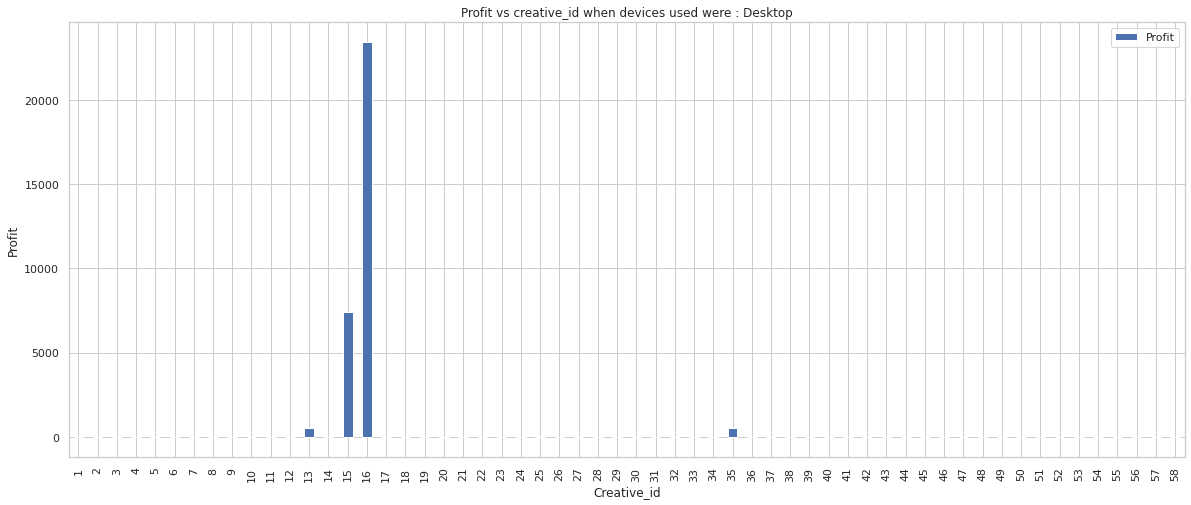

In [ ]:
Desktop_creative_id_profit = Creative_id_profit('Desktop')

Creative id's 13 and 35 has very less amount of Profit.

2. **Creative_id vs Profit when Mobile devices were used**

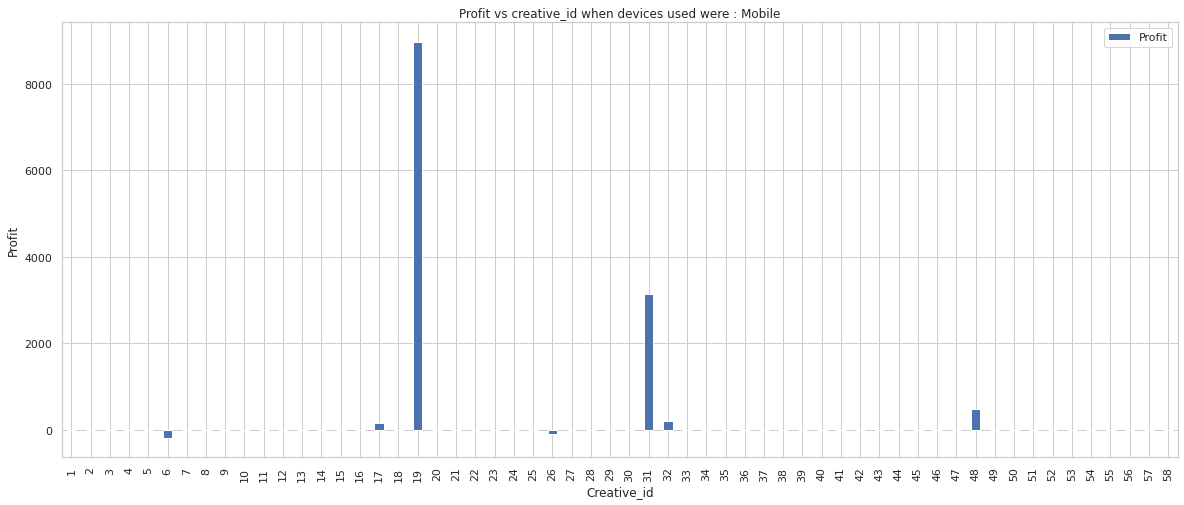

In [ ]:
Mobile_creative_id_profit = Creative_id_profit('Mobile')

Creative id 6, 17, 26, 32 and 48 has either loss or very less amount of profit.

3. **Creative_id vs Profit when Tablet devices were used**

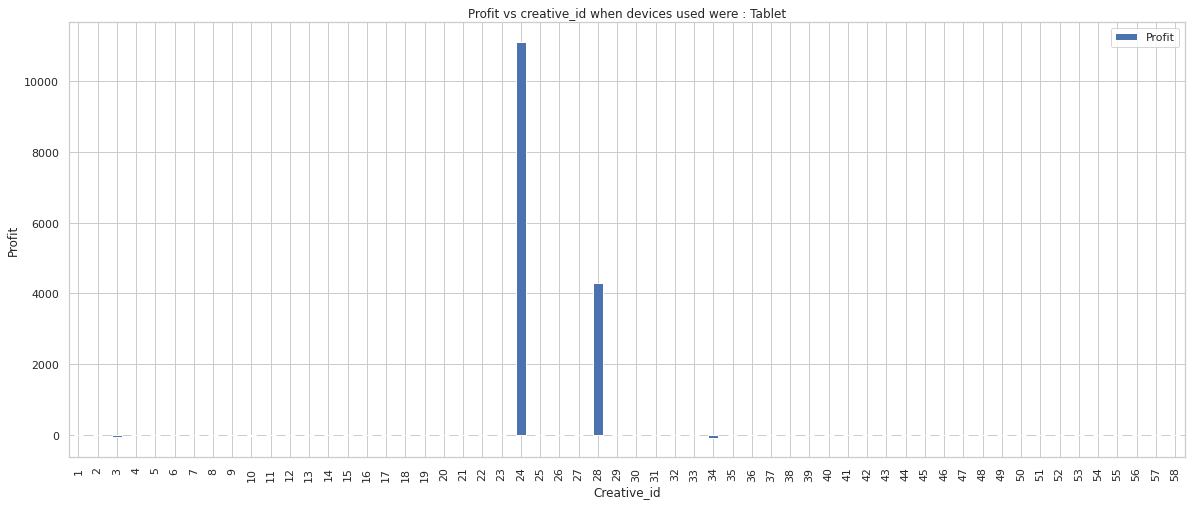

In [ ]:
Tablet_creative_id_profit = Creative_id_profit('Tablet')


Creative id's 3 and 34 have loss.

#Let's plot a combined graph for Creative id vs Profit according the device used.

Text(0, 0.5, 'Profit')

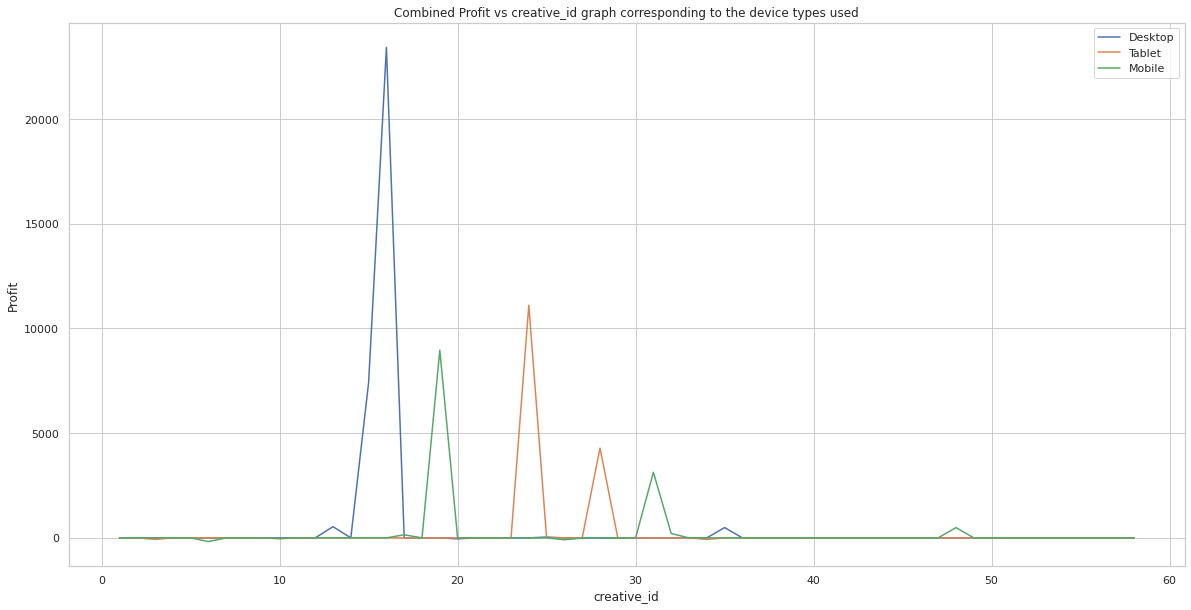

In [ ]:
#Visualization
plt.figure(figsize=(20,10))
plt.plot(Desktop_creative_id_profit['creative_id'], Desktop_creative_id_profit['Profit'] , label = 'Desktop')
plt.plot(Tablet_creative_id_profit['creative_id'], Tablet_creative_id_profit['Profit'] , label = 'Tablet')
plt.plot(Mobile_creative_id_profit['creative_id'], Mobile_creative_id_profit['Profit'] , label = 'Mobile')
plt.legend()
plt.title('Combined Profit vs creative_id graph corresponding to the device types used')
plt.xlabel('creative_id')
plt.ylabel('Profit')

#Visualization of Profit VS Ad_unit_id corresponding to the device used

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Profit_ad_unit_id(device):
  df_Profit_ad_unit_id = []
  for ad_unit_id in merged_df['ad_unit_id'].unique():
    rows = merged_df[(merged_df['ad_unit_id'] == ad_unit_id) & (merged_df['device'] == device)]
    c = (rows['PPM'].multiply(rows['impressions']/1000)).sum()
    df_Profit_ad_unit_id.append([ad_unit_id,c])
  df_Profit_ad_unit_id = pd.DataFrame(df_Profit_ad_unit_id, columns=['ad_unit_id', 'Profit'])
  df_Profit_ad_unit_id = df_Profit_ad_unit_id[df_Profit_ad_unit_id.ad_unit_id != 'Organic']
  df_Profit_ad_unit_id = df_Profit_ad_unit_id.sort_values(by=['ad_unit_id'])
  plt.figure()
  df_Profit_ad_unit_id.plot(x = 'ad_unit_id', y = 'Profit', figsize = (20,10),title = 'Total Profit Vs ad_unit_id id when devices used were :'+str(device))
  plt.ylabel('Total Revenue')
  return df_Profit_ad_unit_id

1. **Profit vs ad_unit_id when Mobile device was used**

<Figure size 432x288 with 0 Axes>

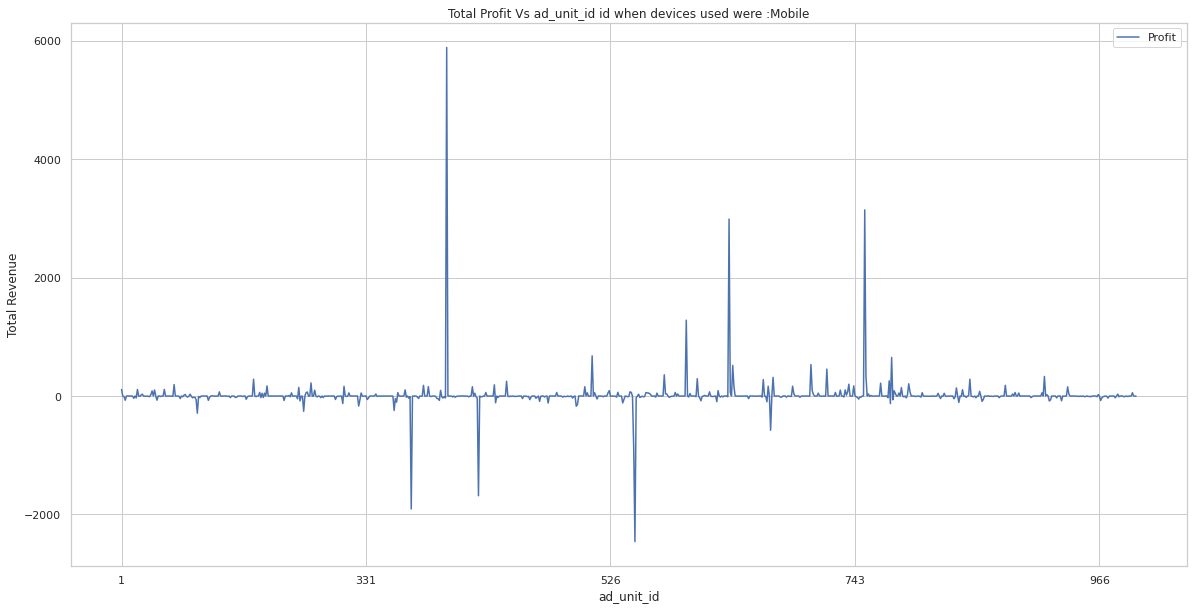

In [ ]:
Mobile_Profit_ad_unit_id = Profit_ad_unit_id('Mobile')


The visualization is not that much clear. So, let's split the ad_unit_id into two parts and plot the graph.

**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_Profit_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Profit', figsize = (20,10), title = 'Profit Vs ad_unit_id(more than 600)')
    plt.ylabel('Revenue')

In [ ]:
def less_than_600_Profit_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Profit', figsize = (20,10), title = 'Profit Vs ad_unit_id(less than 600)')
    plt.ylabel('Revenue')

1.1 **For ad_unit_it less than 600**

<Figure size 432x288 with 0 Axes>

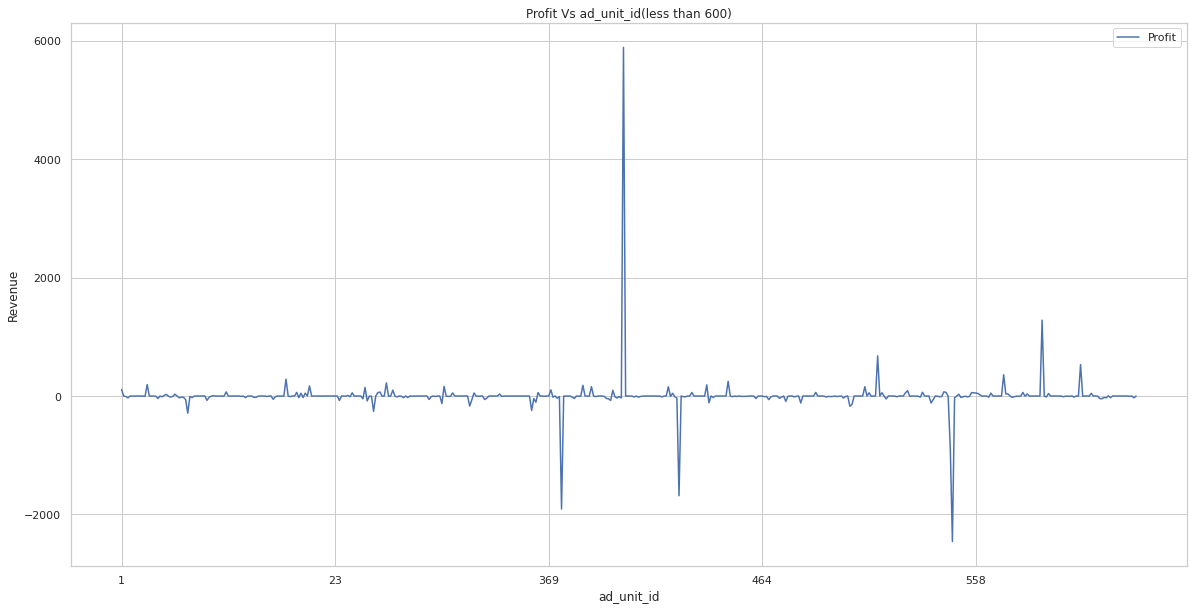

In [ ]:
less_than_600_Profit_ad(Mobile_Profit_ad_unit_id)

1.2 **For ad_unit_id more than 600**

<Figure size 432x288 with 0 Axes>

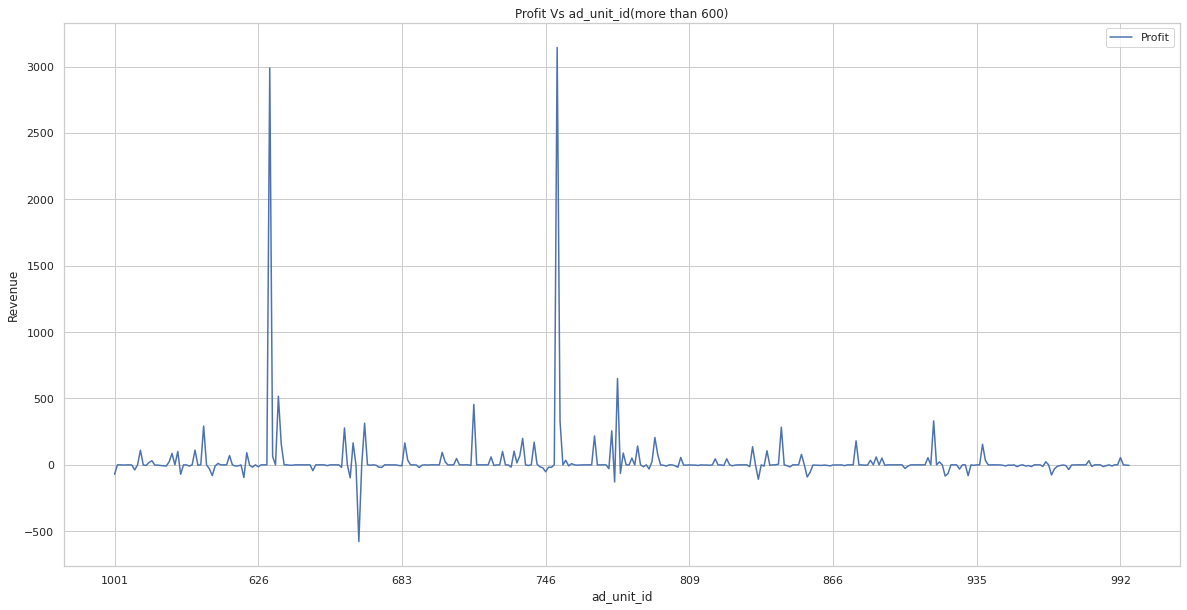

In [ ]:
more_than_600_Profit_ad(Mobile_Profit_ad_unit_id)

2. **Profit vs ad_unit_id when Desktop device was used**

<Figure size 432x288 with 0 Axes>

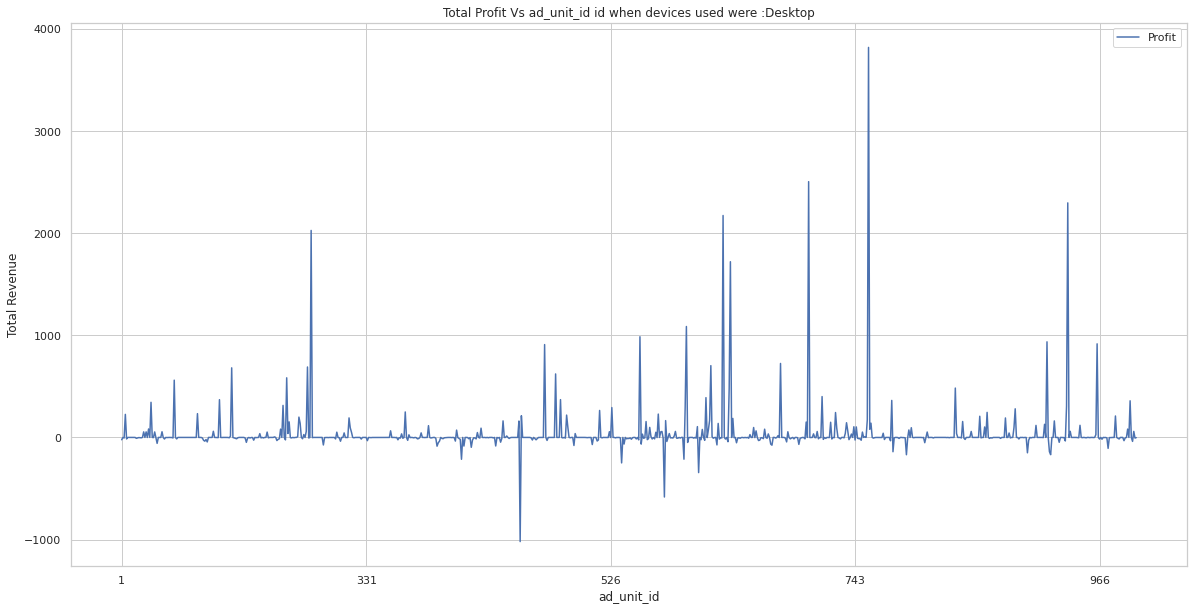

In [ ]:
Desktop_Profit_ad_unit_id = Profit_ad_unit_id('Desktop')


2.1 **For ad_unit_it less than 600**

<Figure size 432x288 with 0 Axes>

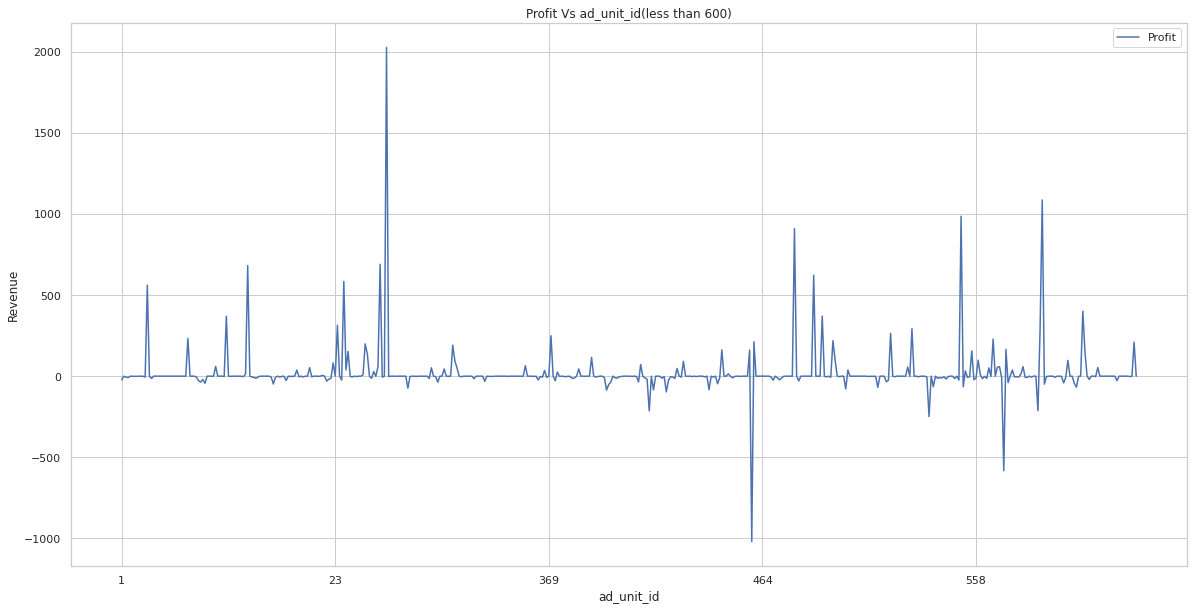

In [ ]:
less_than_600_Profit_ad(Desktop_Profit_ad_unit_id)

2.2 **For ad_unit_id more than 600**

<Figure size 432x288 with 0 Axes>

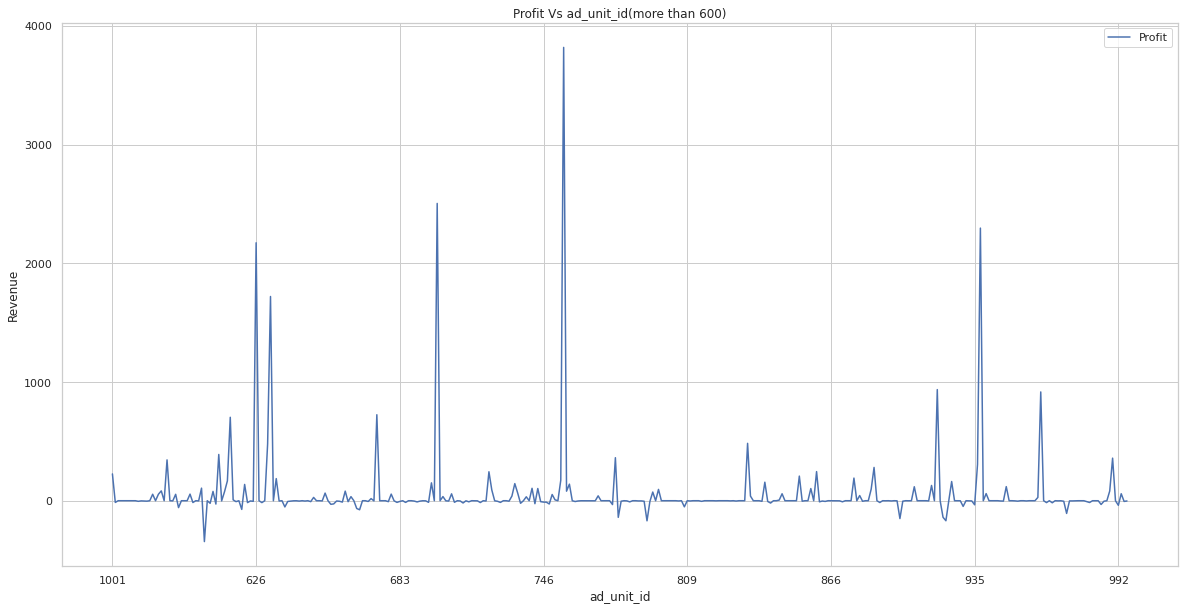

In [ ]:
more_than_600_Profit_ad(Desktop_Profit_ad_unit_id)

2. **Profit vs ad_unit_id when Tablet device was used**

<Figure size 432x288 with 0 Axes>

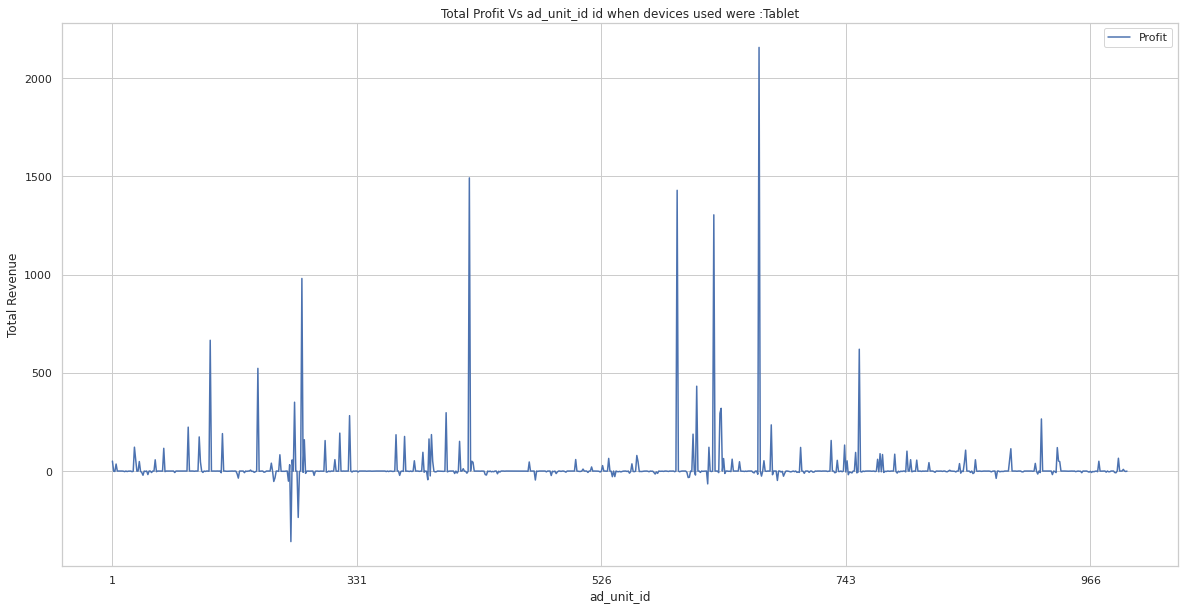

In [ ]:
Tablet_Profit_ad_unit_id = Profit_ad_unit_id('Tablet')


2.1 **For ad_unit_it less than 600**

<Figure size 432x288 with 0 Axes>

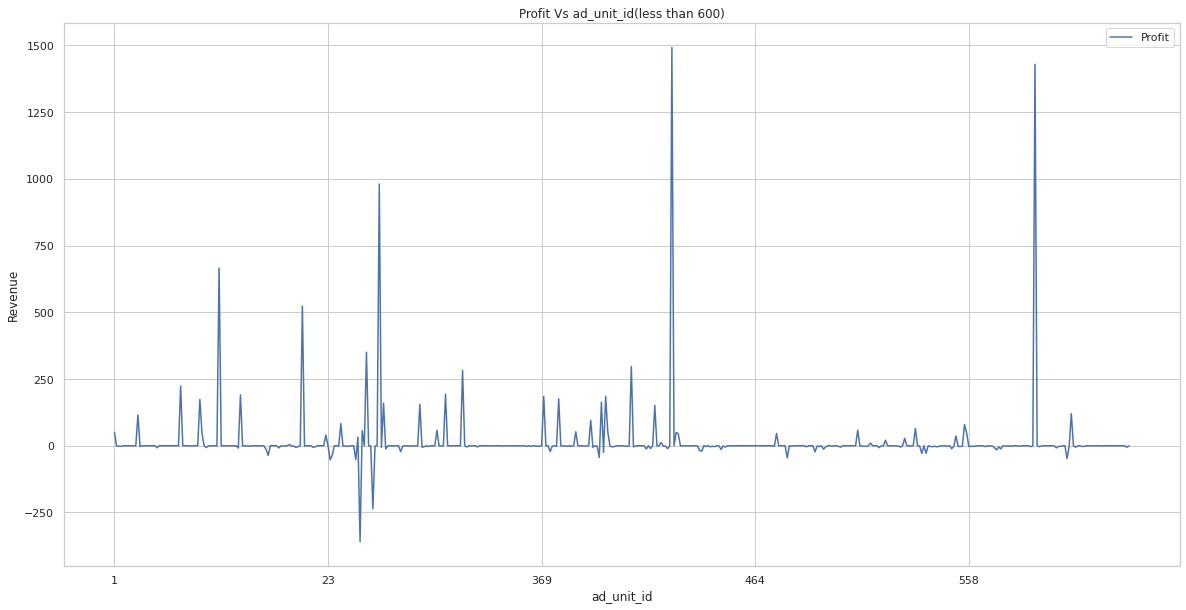

In [ ]:
less_than_600_Profit_ad(Tablet_Profit_ad_unit_id)

2.2 **For ad_unit_id more than 600**

<Figure size 432x288 with 0 Axes>

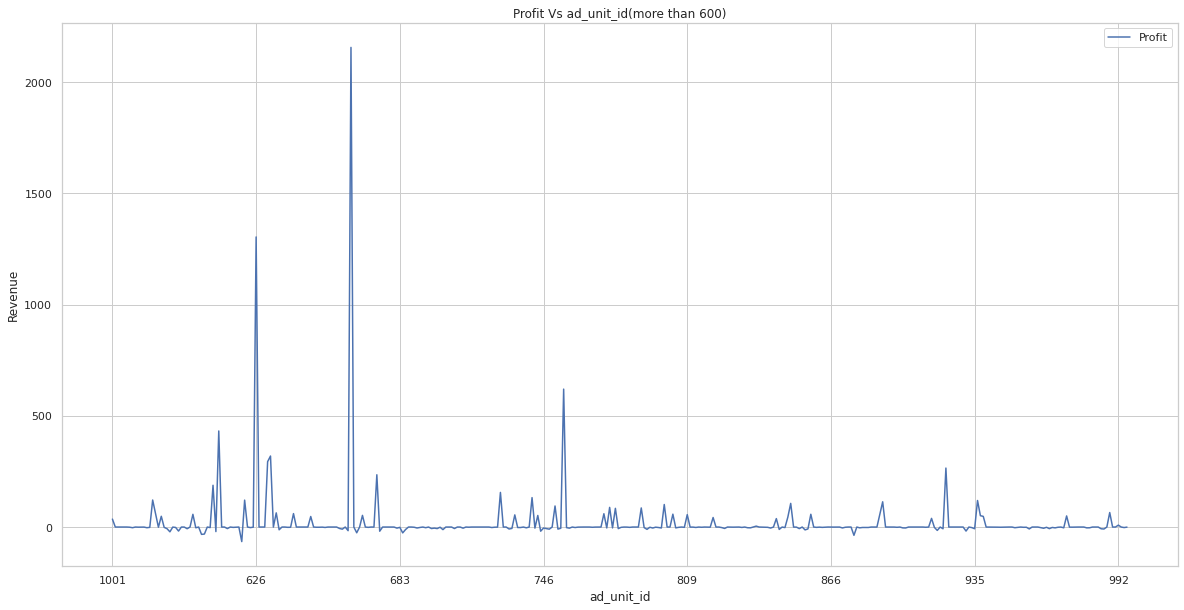

In [ ]:
more_than_600_Profit_ad(Tablet_Profit_ad_unit_id)

#Visualization of Total profit vs Dates as per the Devices used by Users.

#Let's define a function first

In [ ]:
def Profit_date(device):
  df_Profit_date = [] #Creating a new data frame
  for date in merged_df['date'].unique():
    rows = merged_df[(merged_df['date'] == date) & (merged_df['device'] == device)]
    c = (rows['PPM'].multiply(rows['impressions']/1000)).sum()
    df_Profit_date.append([date,c])
  df_Profit_date = pd.DataFrame(df_Profit_date, columns=['date', 'Profit'])
  df_Profit_date = df_Profit_date.sort_values(by=['date'])
  df_Profit_date['date'] = df_Profit_date['date'].dt.date
  plt.figure()
  df_Profit_date.plot(kind = 'bar', x = 'date', y = 'Profit', figsize = (20,8), title = 'Profit vs Date when devices used were : '+str(device))
  plt.xlabel('Dates')
  plt.ylabel('Profit')
  return df_Profit_date

1. **Total profit Vs Dates when Mobile Devices were used by users**

<Figure size 432x288 with 0 Axes>

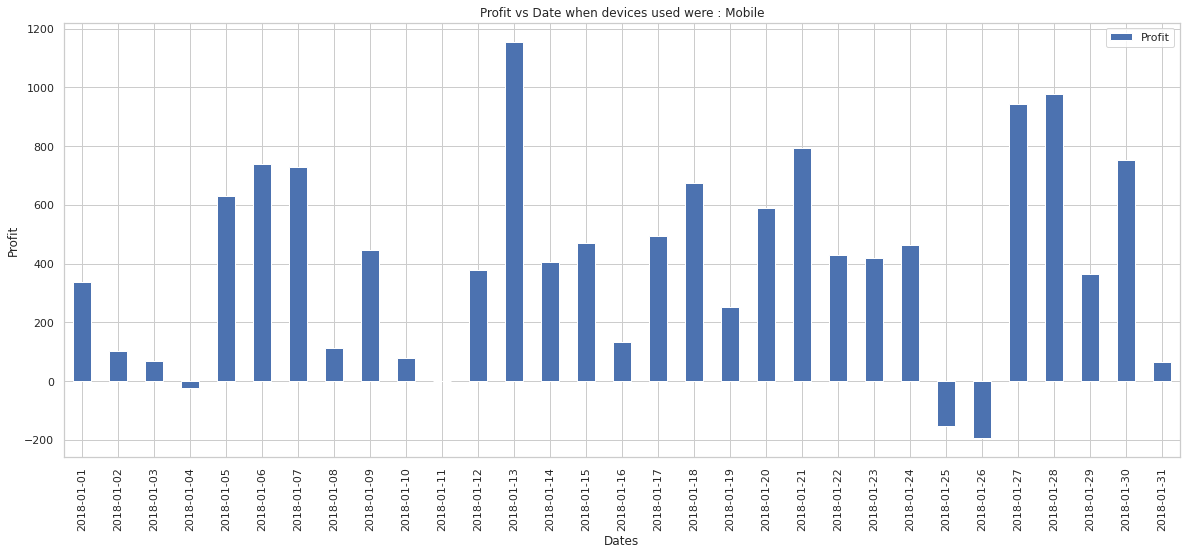

In [ ]:
profit_date_Mobile_df = Profit_date('Mobile')

From the above graph we can see that, when the device used by users is Mobile , company has highest profit on 13th of the month and highest loss on 26th.

2. **Total Profit VS dates when Desktop Devices were used by Users**

<Figure size 432x288 with 0 Axes>

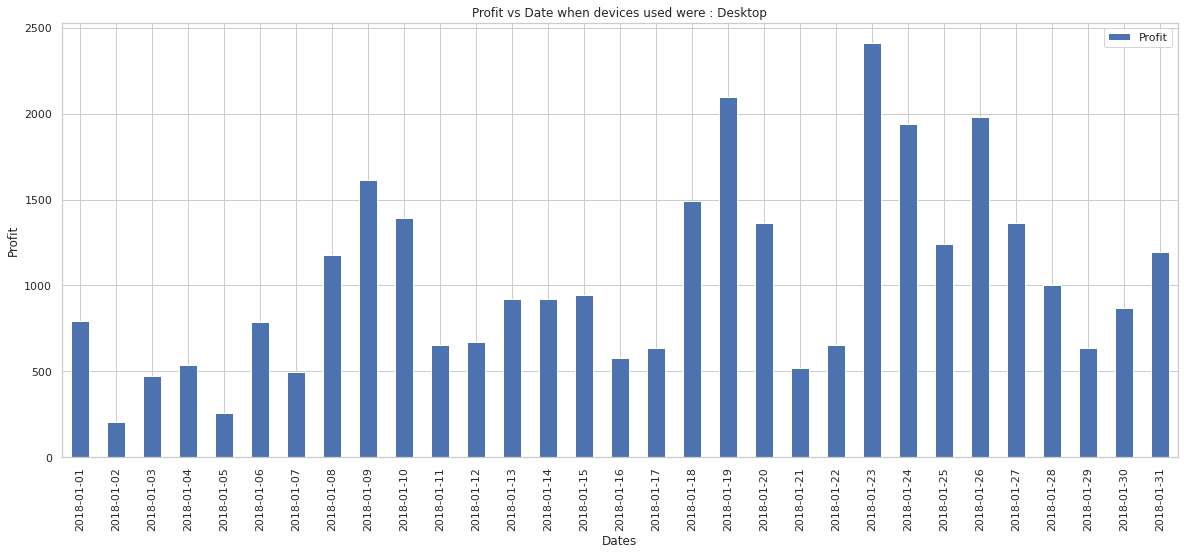

In [ ]:
profit_date_Desktop_df = Profit_date('Desktop')

From the above graph we can see that, when the device used by users is Desktop , company has highest profit on 23rd of the month and no any loss.

3. **Total profit Vs Dates when Tablet devices were used by users.**

<Figure size 432x288 with 0 Axes>

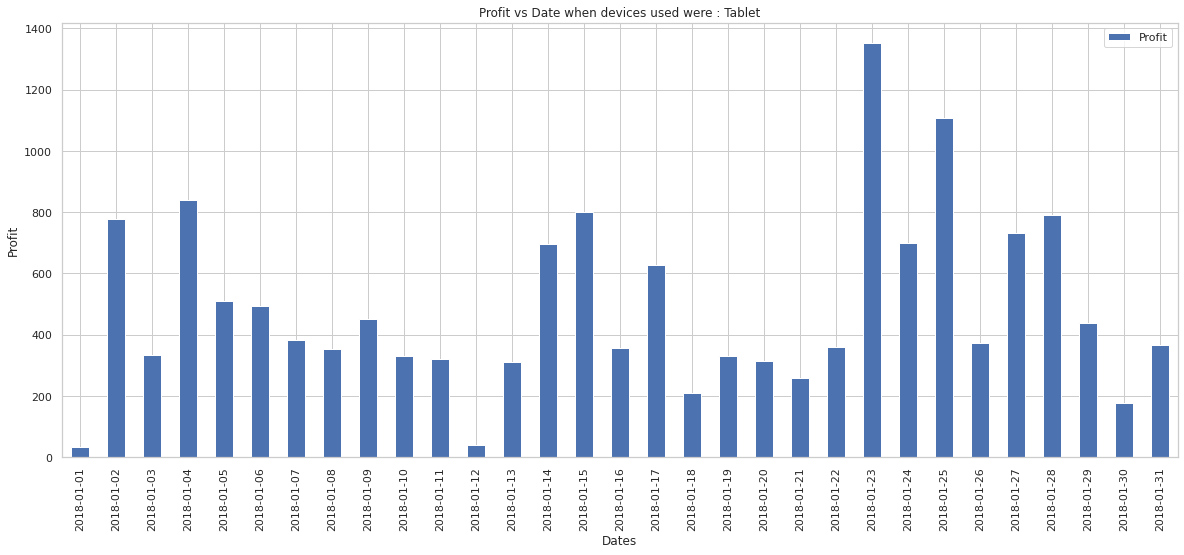

In [ ]:
profit_date_Tablet_df = Profit_date('Tablet')

From the above graph we can see that, when the device used by users is Tablet , company has highest profit on 23rd of the month and no any loss.

#Lets plot combined Profit Vs Date graph corresponding to the device type used.

Text(0, 0.5, 'Profit')

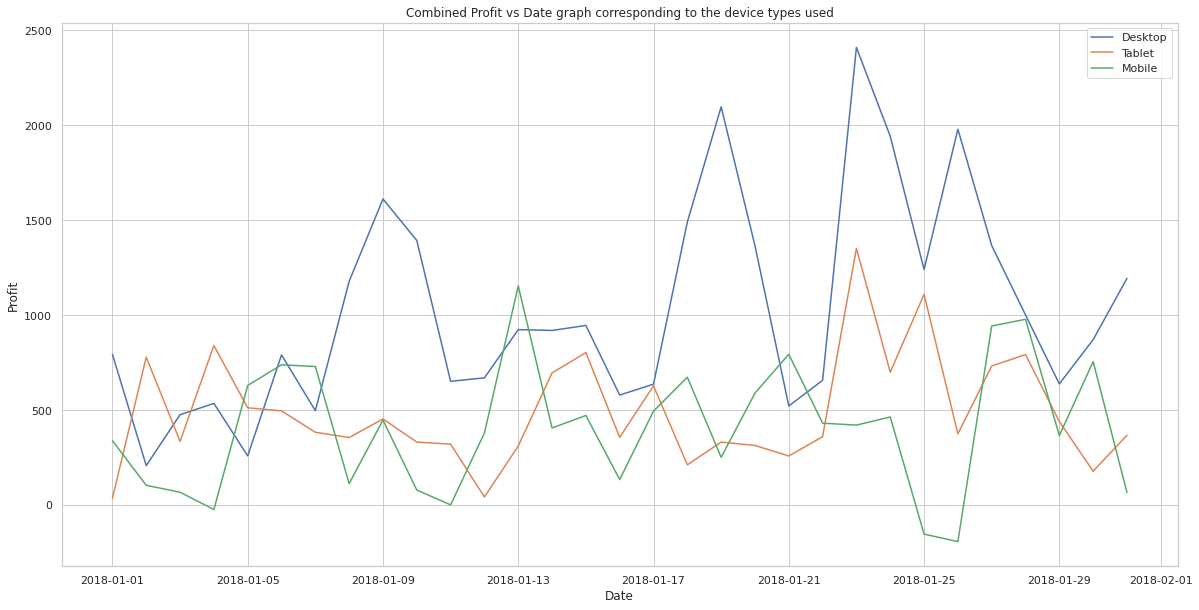

In [ ]:
#Visualization
plt.figure(figsize=(20,10))
plt.plot(profit_date_Desktop_df['date'], profit_date_Desktop_df['Profit'] , label = 'Desktop')
plt.plot(profit_date_Tablet_df['date'], profit_date_Tablet_df['Profit'] , label = 'Tablet')
plt.plot(profit_date_Mobile_df['date'], profit_date_Mobile_df['Profit'] , label = 'Mobile')
plt.legend()
plt.title('Combined Profit vs Date graph corresponding to the device types used')
plt.xlabel('Date')
plt.ylabel('Profit')

From the above graph, we can infer that, in most of the dates, Desktop devices are responsible for high amount of profit.

# Let's plot Total Cost vs Dates corresponding to the device types used by users.

**Let's define a function first**

In [ ]:
def Cost_date(device):
  df_Cost_date = [] #Creating a new data frame
  for date in merged_df['date'].unique():
    rows = merged_df[(merged_df['date'] == date) & (merged_df['device'] == device)]
    c = (rows['CPM'].multiply(rows['impressions']/1000)).sum()
    df_Cost_date.append([date,c])
  df_Cost_date = pd.DataFrame(df_Cost_date, columns=['date', 'Cost'])
  df_Cost_date = df_Cost_date.sort_values(by=['date'])
  df_Cost_date['date'] = df_Cost_date['date'].dt.date
  plt.figure()
  df_Cost_date.plot(x = 'date', y = 'Cost',kind = 'bar', figsize = (20,8), title = 'Cost vs Date when Devices used were:'+str(device))
  plt.ylabel('Frequency')
  plt.xlabel('Date')
  plt.ylabel('Cost')
  return df_Cost_date

1. **When Mobile devices were used by users.**

<Figure size 432x288 with 0 Axes>

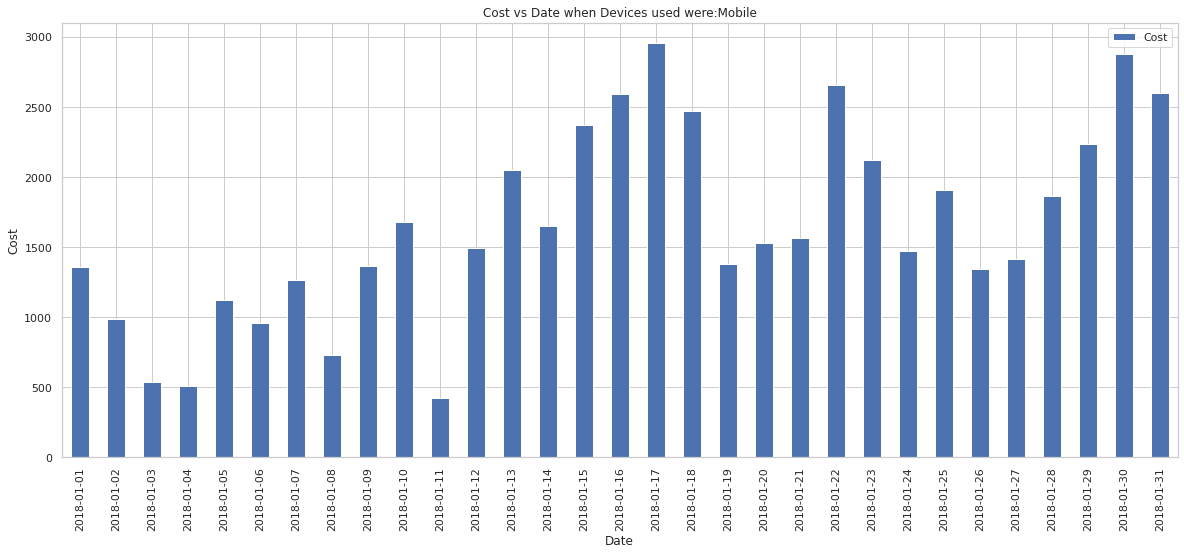

In [ ]:
Cost_date_Mobile = Cost_date('Mobile')
# Visualization


The money paid to the publisher by the company is highest on 17th of the month and lowest on 11th of the month when Mobile Devices were used by users.

2. **When Desktop Devices were used by users.**

<Figure size 432x288 with 0 Axes>

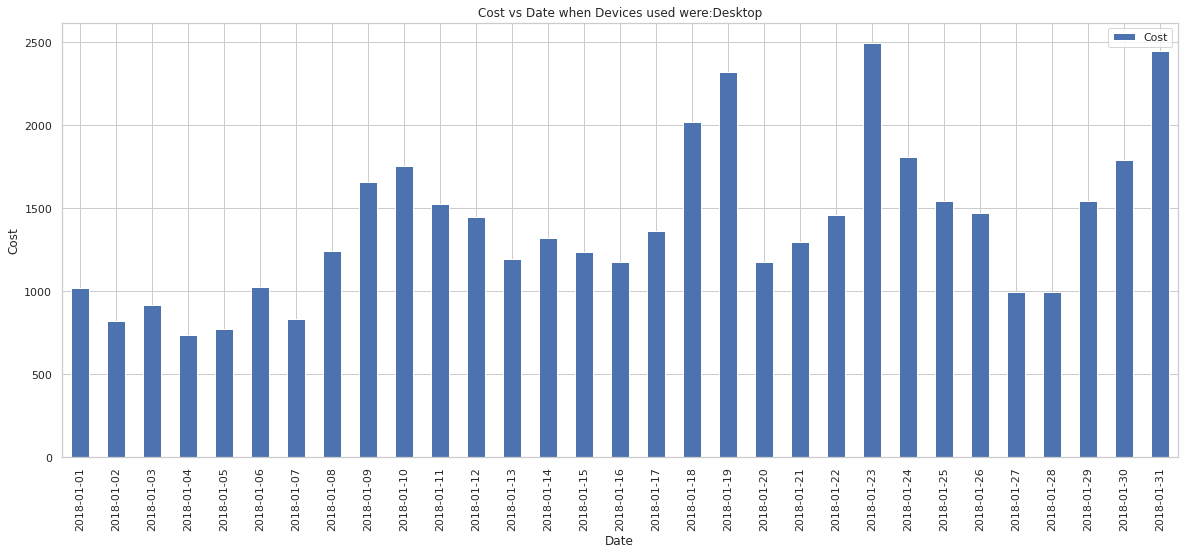

In [ ]:
Cost_date_Desktop = Cost_date('Desktop')

The money paid to the publisher by the company is highest on 23rd of the month and lowest on 4th of the month when Desktop Devices were used by users.

3. **When Tablet Devices were used by users**

<Figure size 432x288 with 0 Axes>

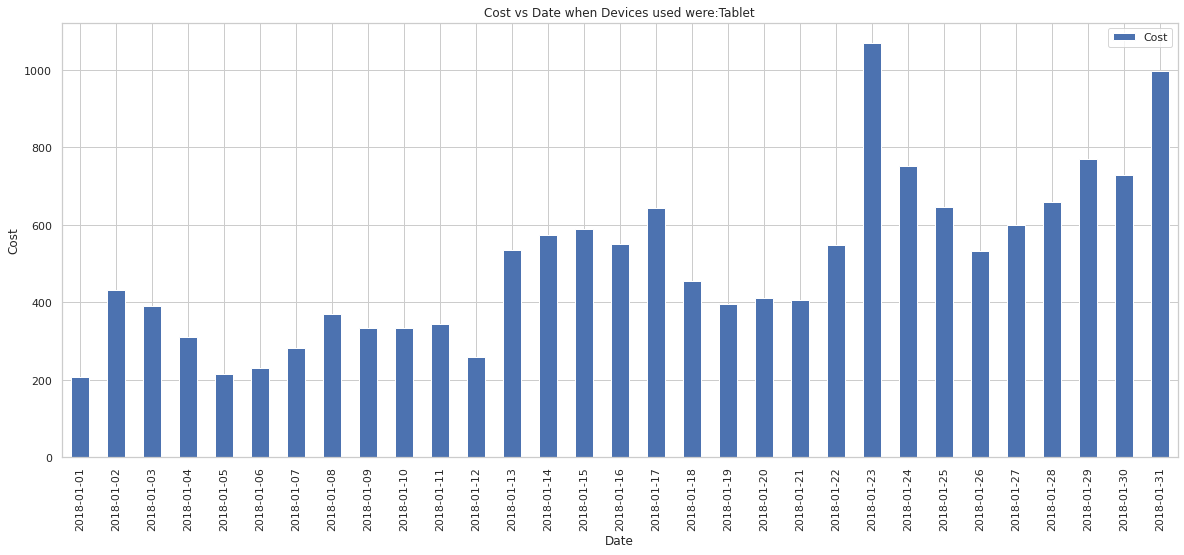

In [ ]:
Cost_date_Tablet = Cost_date('Tablet')

The money paid to the publisher by the company is highest on 23rd of the month and lowest on 1st of the month when Tablet Devices were used by users.

# Let's plot combined cost vs date Graph for Corresponding devices

Text(0, 0.5, 'Cost')

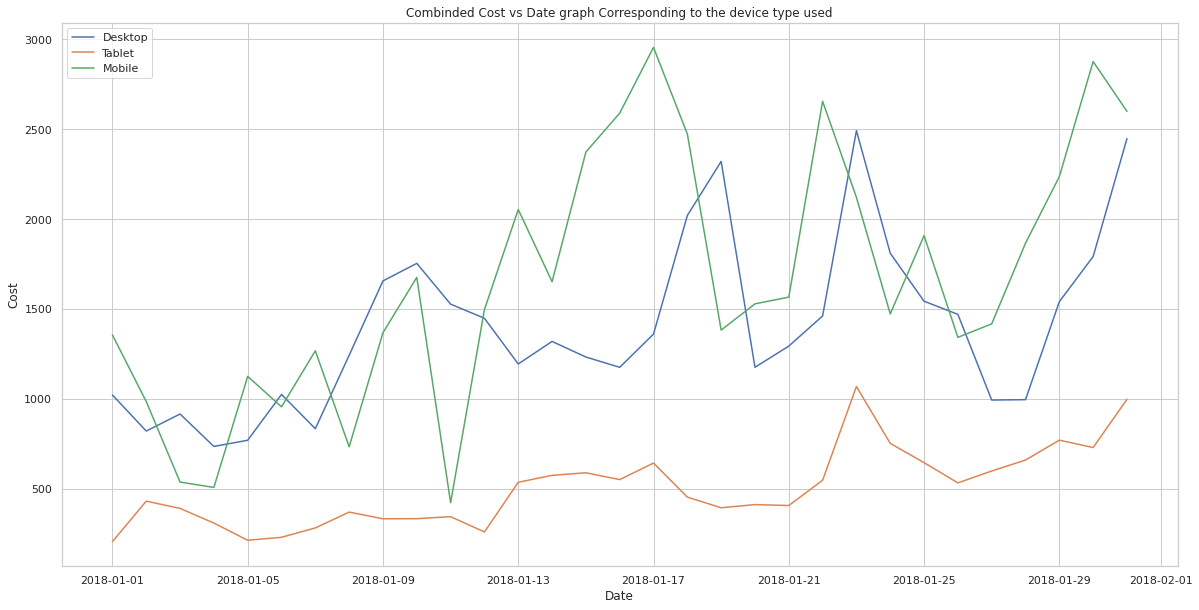

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.plot(Cost_date_Desktop['date'], Cost_date_Desktop['Cost'] , label = 'Desktop')
plt.plot(Cost_date_Tablet['date'], Cost_date_Tablet['Cost'] , label = 'Tablet')
plt.plot(Cost_date_Mobile['date'], Cost_date_Mobile['Cost'] , label = 'Mobile')
plt.title('Combinded Cost vs Date graph Corresponding to the device type used' )
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cost')

#Let's plot Revenue vs dates according the device used by users.

**Let's define a function first**

In [ ]:
def Revenue_date(device):
  df_Revenue_date = [] #Creating a new data frame
  for date in merged_df['date'].unique():
    rows = merged_df[(merged_df['date'] == date) & (merged_df['device'] == device)]
    c = (rows['RPM'].multiply(rows['impressions']/1000)).sum()
    df_Revenue_date.append([date,c])
  df_Revenue_date = pd.DataFrame(df_Revenue_date, columns=['date', 'Revenue'])
  df_Revenue_date = df_Revenue_date.sort_values(by=['date'])
  df_Revenue_date['date'] = df_Revenue_date['date'].dt.date
  plt.figure()
  df_Revenue_date.plot(x = 'date',kind ='bar', y = 'Revenue', figsize = (20,8), title = 'Revenue vs Date when devices used were :'+str(device))
  plt.xlabel('Date')
  plt.ylabel('Revenue')
  return df_Revenue_date

1.**Revenue vs dates when desktop devices were used by users.**

<Figure size 432x288 with 0 Axes>

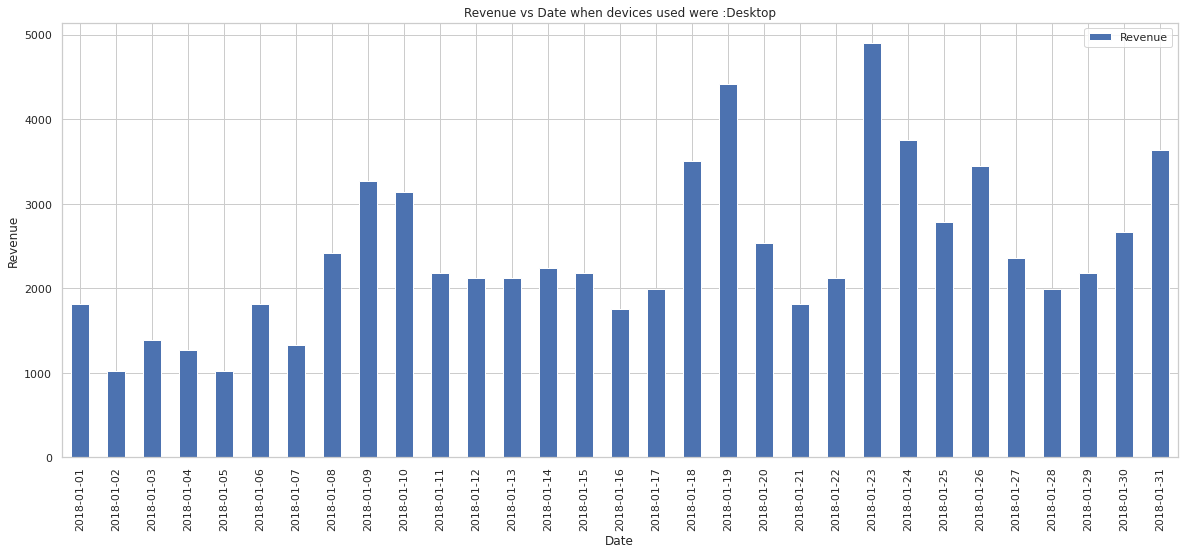

In [ ]:
Desktop_revenue_date = Revenue_date('Desktop')

We can see that on 23rd the revenue was high as per the Desktop devices were used by users.

2.**Revenue vs date when Mobile devices were used by users.**

<Figure size 432x288 with 0 Axes>

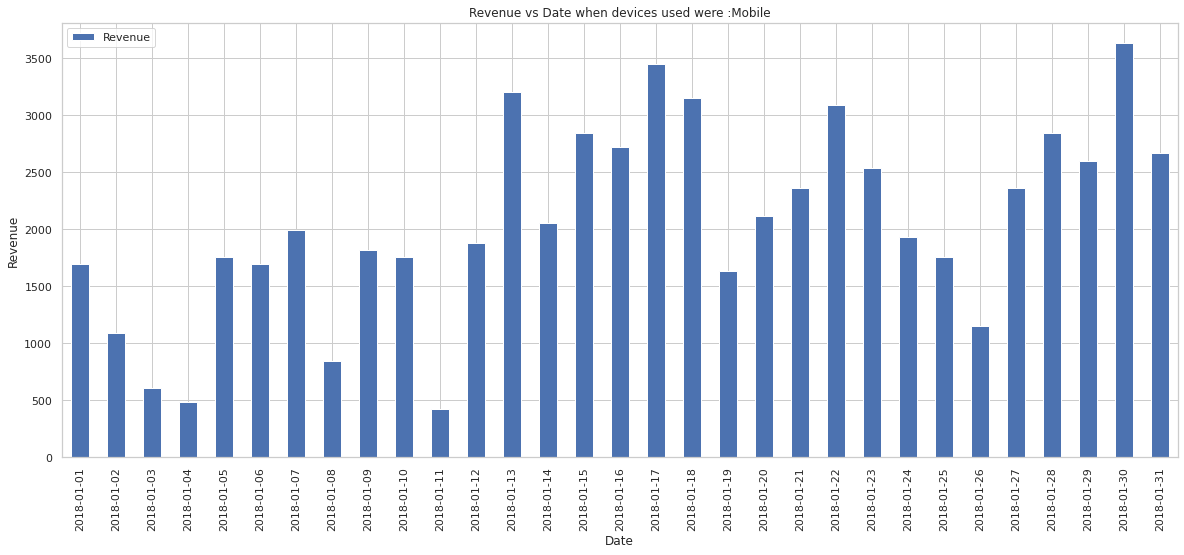

In [ ]:
Mobile_revenue_date = Revenue_date('Mobile')

We can see that maximum revenue is on 30th and lowest on 11th.

3. **Revenue vs date when Tablet devices were used by users.**

<Figure size 432x288 with 0 Axes>

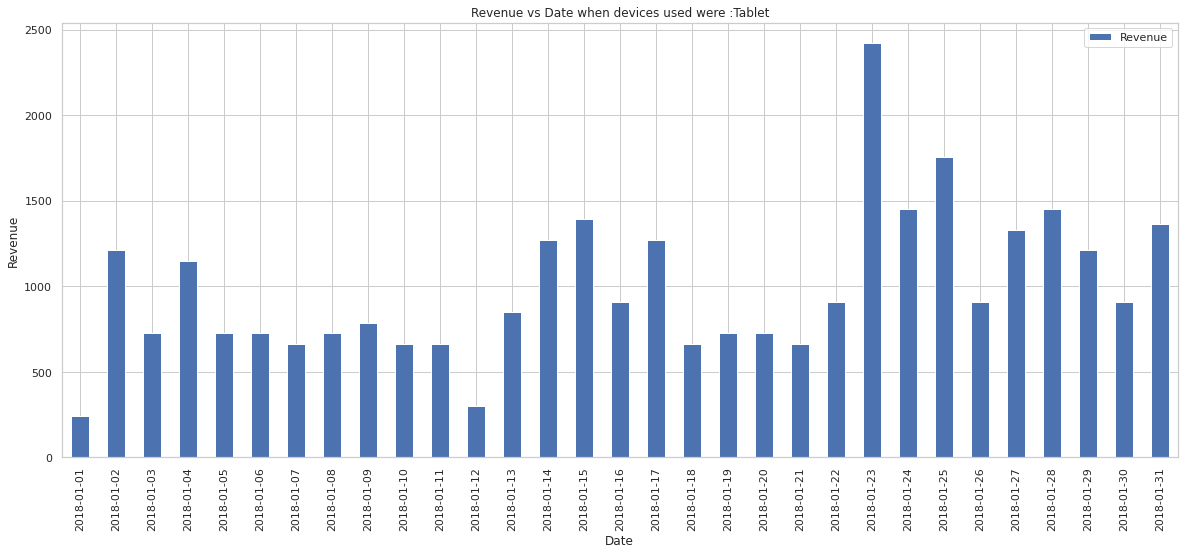

In [ ]:
Tablet_revenue_date = Revenue_date('Tablet')

We can see that maximum revenue is on 23rd and lowest on 1st.

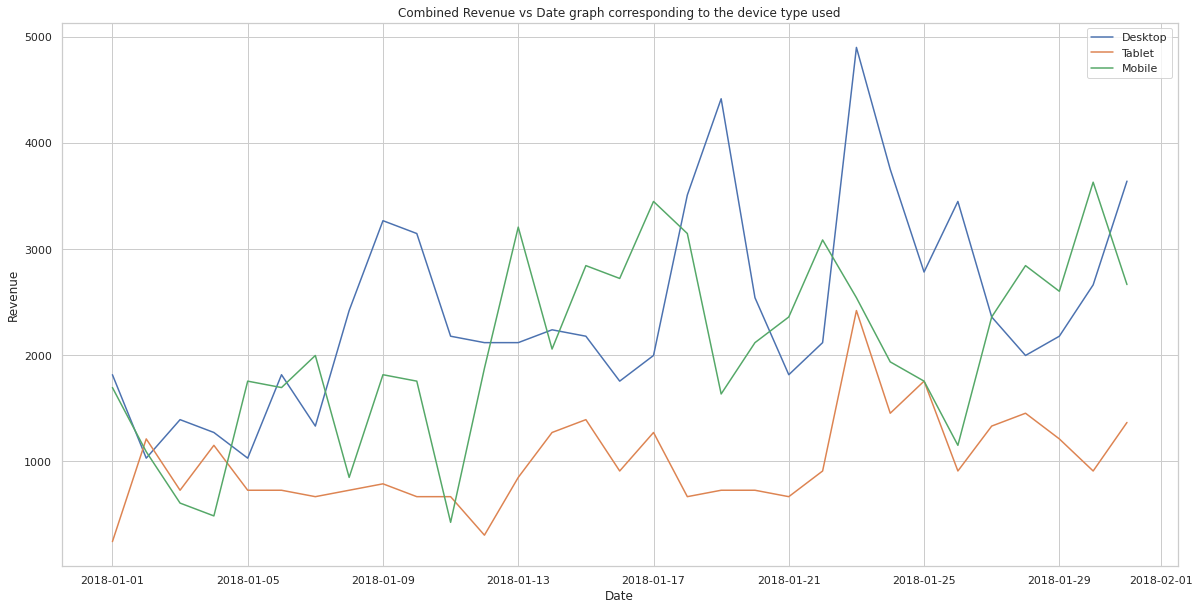

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.plot(Desktop_revenue_date['date'], Desktop_revenue_date['Revenue'] , label = 'Desktop')
plt.plot(Tablet_revenue_date['date'], Tablet_revenue_date['Revenue'] , label = 'Tablet')
plt.plot(Mobile_revenue_date['date'], Mobile_revenue_date['Revenue'] , label = 'Mobile')
plt.title('Combined Revenue vs Date graph corresponding to the device type used' )
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()

#Let's visualize  Revenue vs ad_unit_id Graph corresponding to the device type used.

#Firstly define a function that takes device type as an argument and returns a DataFrame containing necessary information.

In [ ]:
def Revenue_ad_unit_id(device):
  df_Revenue_ad_unit_id = []
  for ad_unit_id in merged_df['ad_unit_id'].unique():
    rows = merged_df[(merged_df['ad_unit_id'] == ad_unit_id) & (merged_df['device'] == device)]
    c = (rows['RPM'].multiply(rows['impressions']/1000)).sum()
    df_Revenue_ad_unit_id.append([ad_unit_id,c])
  df_Revenue_ad_unit_id = pd.DataFrame(df_Revenue_ad_unit_id, columns=['ad_unit_id', 'Revenue'])
  df_Revenue_ad_unit_id = df_Revenue_ad_unit_id[df_Revenue_ad_unit_id.ad_unit_id != 'Organic']
  df_Revenue_ad_unit_id = df_Revenue_ad_unit_id.sort_values(by=['ad_unit_id'])
  plt.figure()
  df_Revenue_ad_unit_id.plot(x = 'ad_unit_id', y = 'Revenue', figsize = (20,10),title = 'Total Revenue Vs ad_unit_id id when devices used were :'+str(device))
  plt.ylabel('Total Revenue')
  return df_Revenue_ad_unit_id

1. **Revenue vs ad_unit_id when Mobile device was used**

<Figure size 432x288 with 0 Axes>

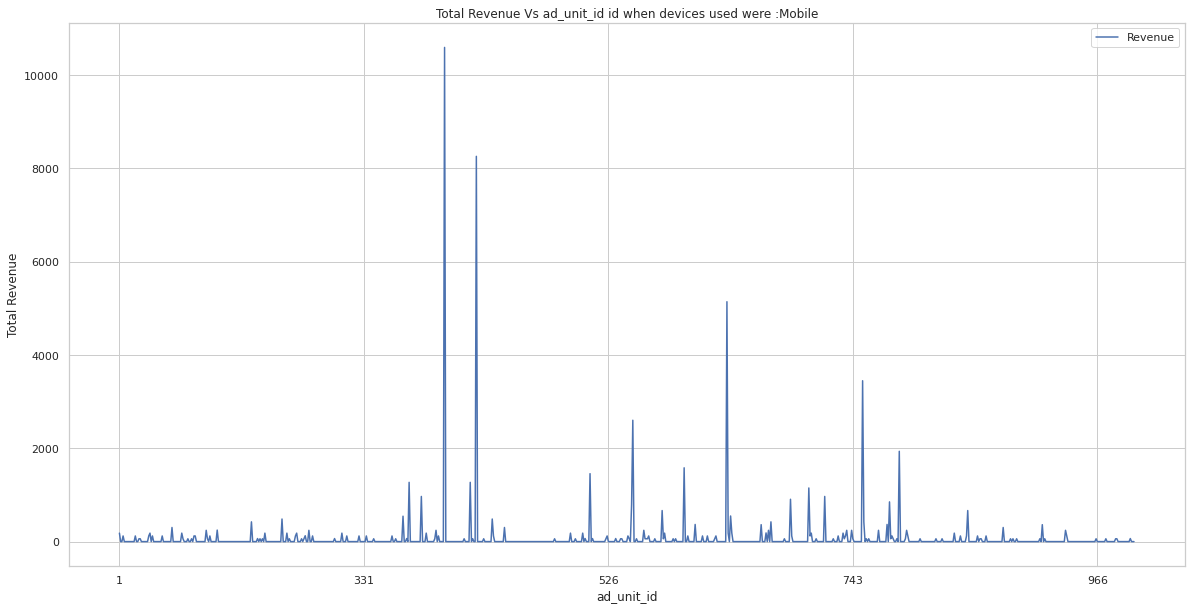

In [ ]:
Mobile_revenue_ad_unit_id = Revenue_ad_unit_id('Mobile')


The visualization is not that much clear. So, let's split the ad_unit_id into two parts and plot the graph.

**Let's define another function that plots graph for ad_unit_id more than 600:**

In [ ]:
def more_than_600_rev_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)> 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Revenue', figsize = (20,10), title = 'Revenue Vs ad_unit_id(more than 600)')
    plt.ylabel('Revenue')

In [ ]:
def less_than_600_rev_ad(device_revenue_vs_ad_df):
    # Creating a new data frame
    device_revenue_vs_ad_df= device_revenue_vs_ad_df[(device_revenue_vs_ad_df['ad_unit_id'].astype(int)< 600)]
    # Visualization
    plt.figure()
    device_revenue_vs_ad_df.plot(x = 'ad_unit_id', y = 'Revenue', figsize = (20,10), title = 'Revenue Vs ad_unit_id(less than 600)')
    plt.ylabel('Revenue')

1.1 **When ad_unit_id is more than 600 for Mobile Devices**

<Figure size 432x288 with 0 Axes>

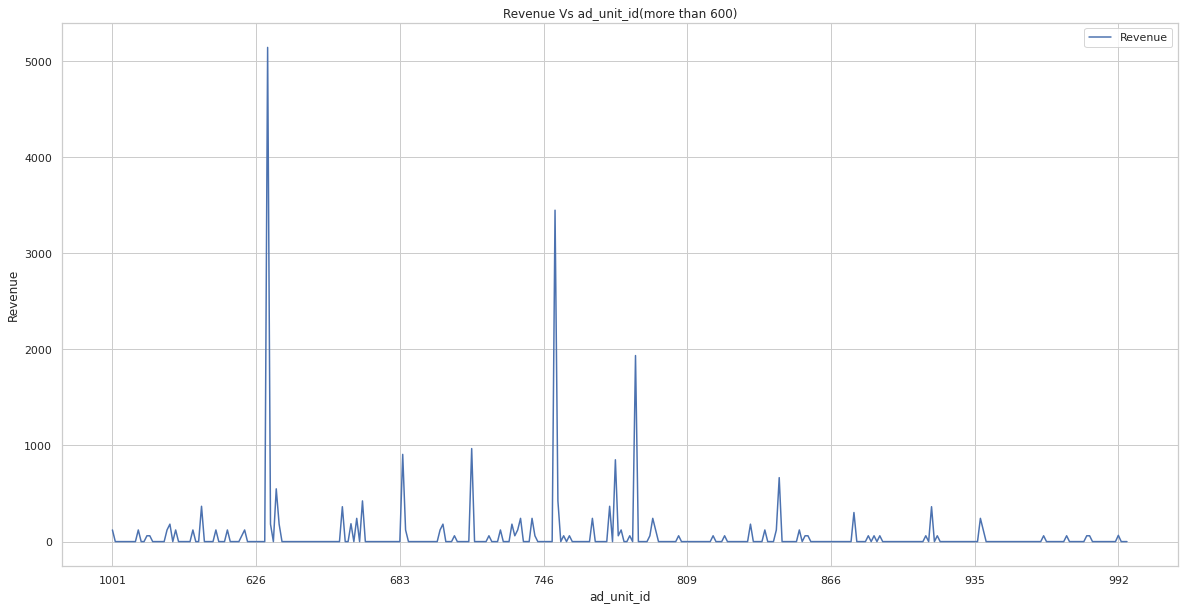

In [ ]:
more_than_600_rev_ad(Mobile_revenue_ad_unit_id)

Now, we can see that ad_unit_id around 630 and around 750 has more contribution in the revenue. The company should exclude the use of ad_unit_id which has no any contribution is revenue.

1.2  **When ad_unit_id is less than 600 for Mobile Devices**

<Figure size 432x288 with 0 Axes>

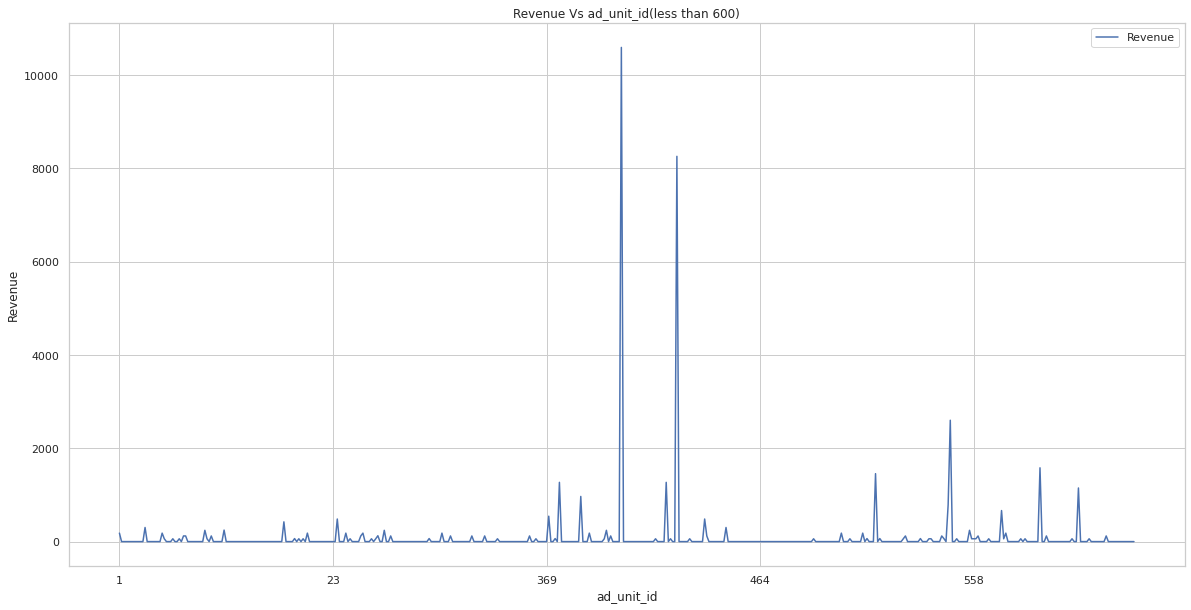

In [ ]:
less_than_600_rev_ad(Mobile_revenue_ad_unit_id)

We can see that ad_unit_id's less than 369 have very small contribution in the Revenue of the company. So we can exclude those id's.

2. **Revenue Vs ad_unit_id for Desktop devices**

<Figure size 432x288 with 0 Axes>

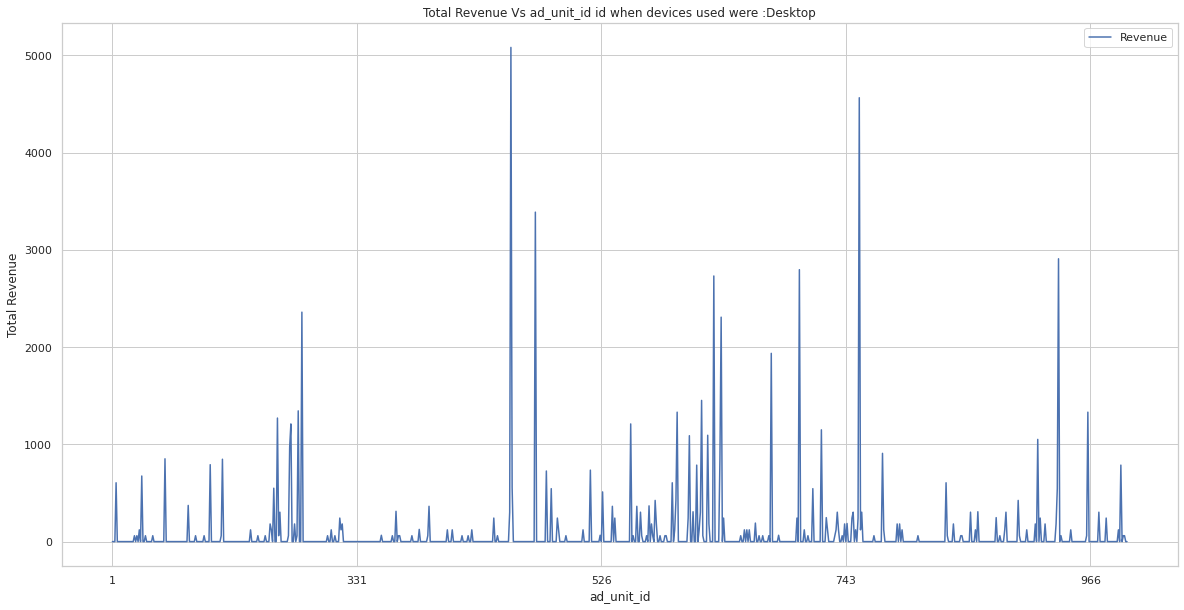

In [ ]:
Desktop_revenue_ad_unit_id = Revenue_ad_unit_id('Desktop')


Let's split the ad_unit_id's into two parts and make the visualization more clear.

_NOTE : The ad_unit_id's can be splitted into more parts or can be viewed in the larger screen for precise conclusions._

2.1 **For ad_unit_id's more than 600.**

<Figure size 432x288 with 0 Axes>

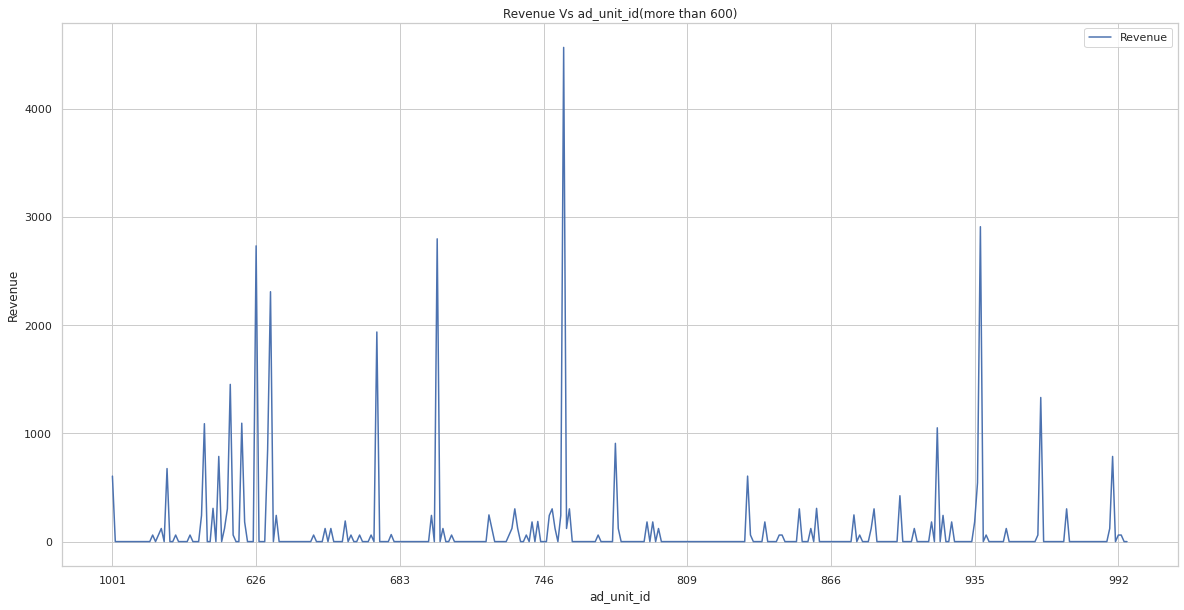

In [ ]:
more_than_600_rev_ad(Desktop_revenue_ad_unit_id)

We can see that the revenue is high  when the ad_unit_id is around 626, 746 and 935 for Desktop devices.

2.2 **When ad_unit_id is less than 600 for Desktop devices.**

<Figure size 432x288 with 0 Axes>

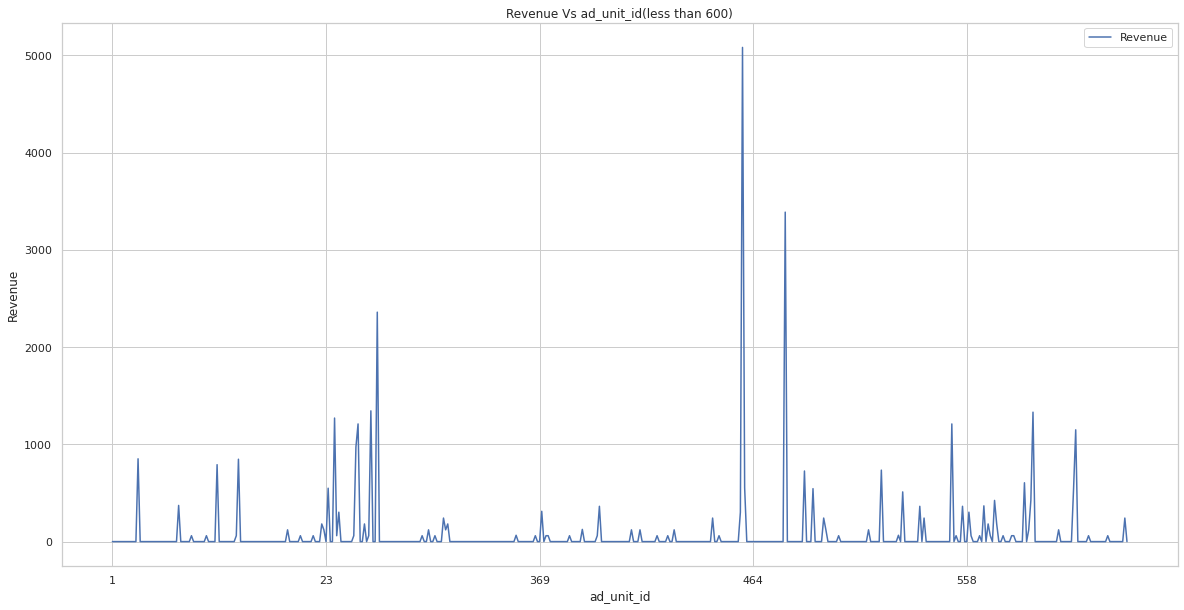

In [ ]:
less_than_600_rev_ad(Desktop_revenue_ad_unit_id)

Ad unit id's around 23, around 464 and around 558 is increasing the revenue from Desktop device users. So company should focus on using them more for Desktop devices. I recommend company to avoid the ad_unit_id's which don't havd any contribution in revenue.

## 3. Revenue vs ad_unit_id graph when Tablet devices were used

<Figure size 432x288 with 0 Axes>

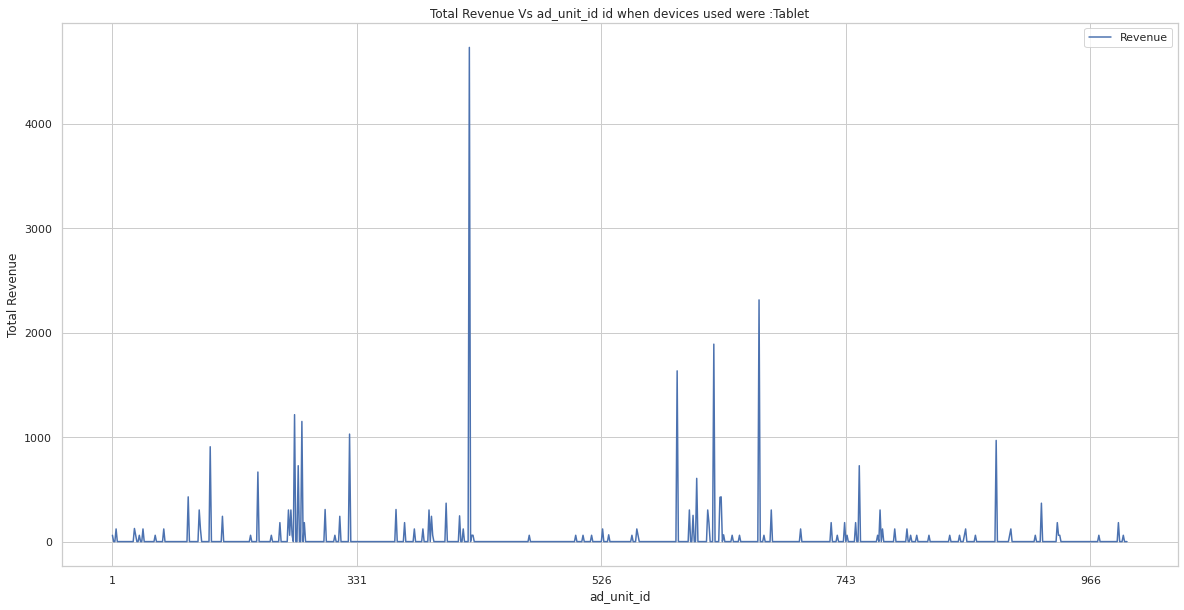

In [ ]:
Tablet_revenue_ad_unit_id = Revenue_ad_unit_id('Tablet')


Let's visualize more clearly splitting the ad_unit_id into two parts.

3.1 **When ad_unit id is more than 600**

<Figure size 432x288 with 0 Axes>

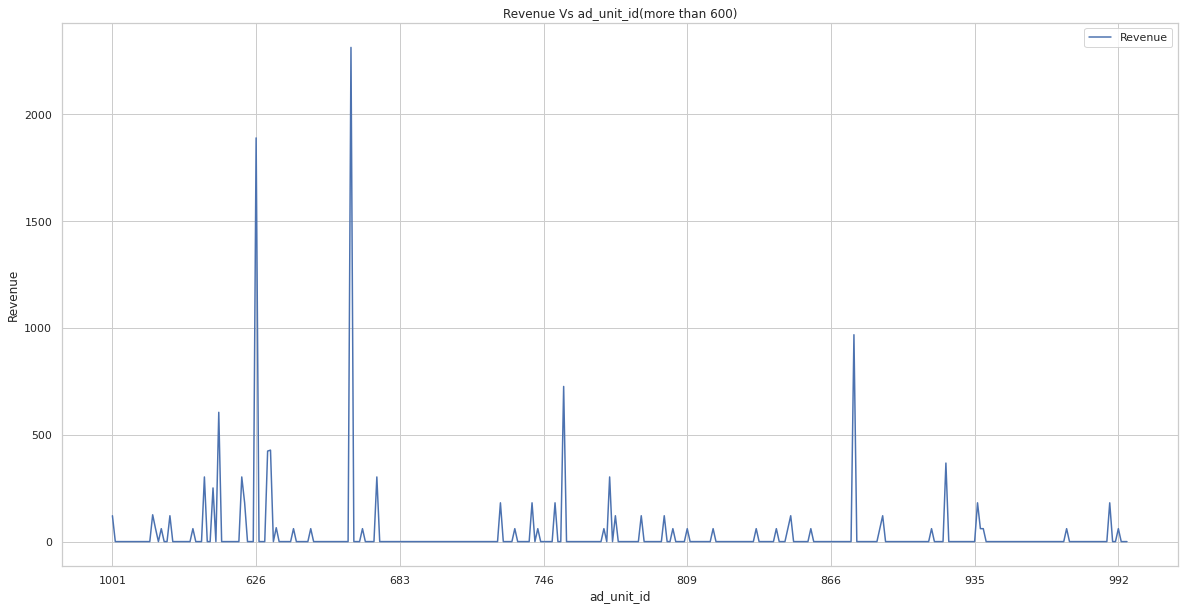

In [ ]:
more_than_600_rev_ad(Tablet_revenue_ad_unit_id)

We can see that ad_unit_id's around 626 and 650 is increasing the revenue for from Tablet device users. So, I recommend using those ad_unit_id's and excluding non-contributing ad_unit_id's for tablet devices looking at the above graph.

3.2 **When the ad_unit_id is less than 600.**

<Figure size 432x288 with 0 Axes>

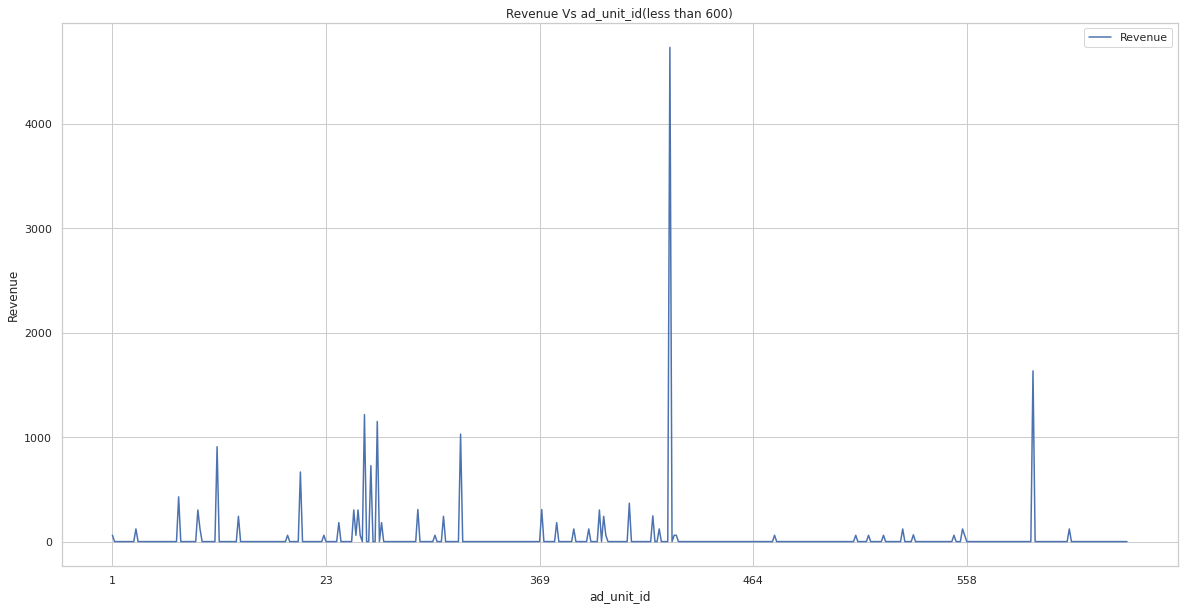

In [ ]:
less_than_600_rev_ad(Tablet_revenue_ad_unit_id)

We can see that ad_unit_id's around 30 and 400 is increasing the revenue for from Tablet device users. So, I recommend using those ad_unit_id's and excluding non-contributing ad_unit_id's inferring from above graph.

#Let's plot Revenue Vs creative_id graph corresponding to the Device Type

#Let's define a function first

In [ ]:
def Rev_vs_creative(device):
  df_creative_Revenue = []
  for creative_id in merged_df['creative_id'].unique():
    rows = merged_df[(merged_df['creative_id'] == creative_id) & (merged_df['device'] == device)]
    c = (rows['RPM'].multiply(rows['impressions']/1000)).sum()
    df_creative_Revenue.append([creative_id,c])
  df_creative_Revenue = pd.DataFrame(df_creative_Revenue, columns=['creative_id', 'Revenue'])
  df_creative_Revenue = df_creative_Revenue.sort_values(by=['creative_id'])
  plt.figure()
  df_creative_Revenue.plot(kind = 'bar', x = 'creative_id', y = 'Revenue', figsize = (20,10),rot = 0,title = 'Total Revenue Vs creative_id id when device used were : '+str(device))
  plt.ylabel('Total Revenue')
  return df_creative_Revenue

1. **Revenue Vs creative_id when device type is Desktop.**




<Figure size 432x288 with 0 Axes>

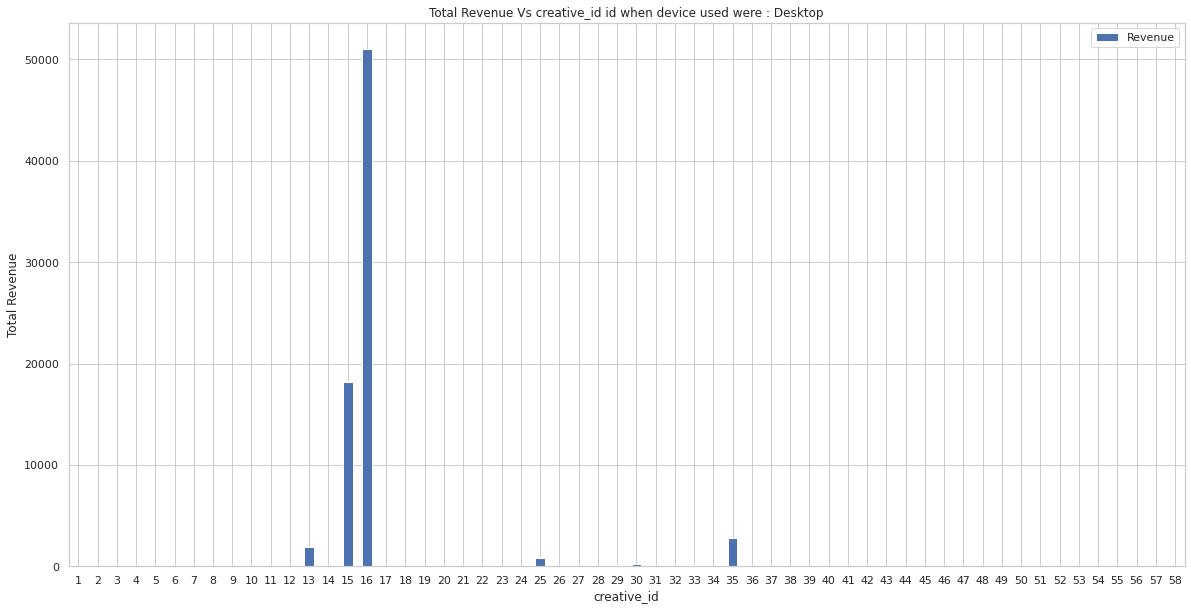

In [ ]:
Desktop_creative = Rev_vs_creative('Desktop')

We can see that for the Desktop device the revenue is high when creative id is 15 and 16. Company can boost up the revenue using those creative id for Desktop devices. The use of creative id's which don't have any contribution should be avoided.

2. **Revenue Vs creative_id when device type is Mobile.**


<Figure size 432x288 with 0 Axes>

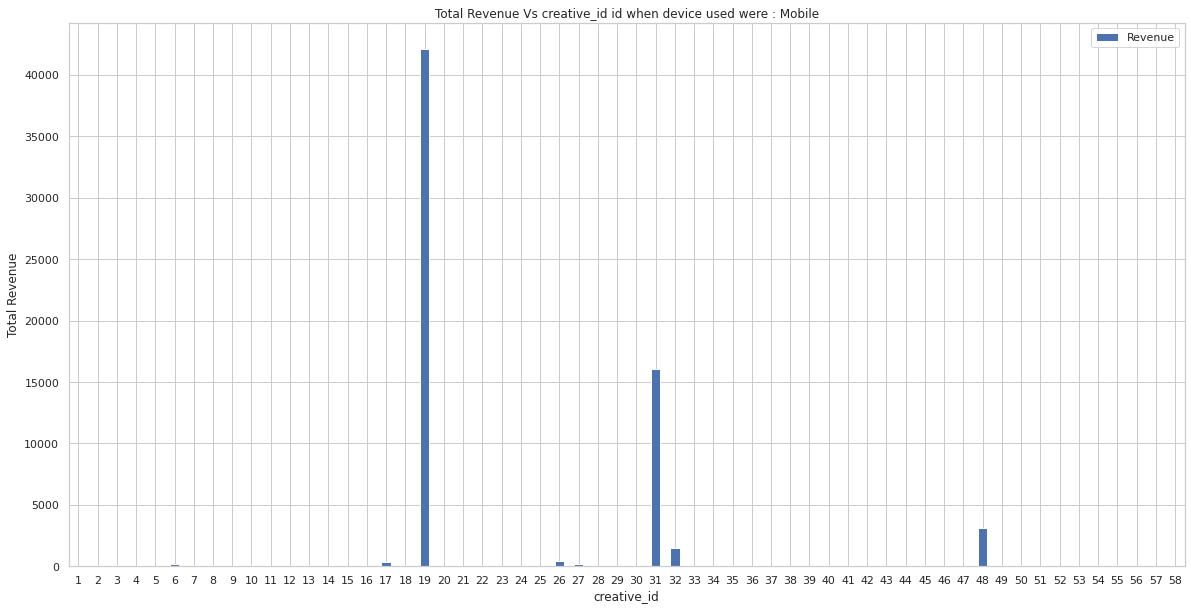

In [ ]:
Mobile_Creative = Rev_vs_creative('Mobile')

From the above graph, for Mobile device, we can see that for creative id 19 and 31 have most contribution in the revenue of the company. So using those creative id's, in Mobile Devices, can boost up the revenue of the company. I recommend not to use the creative id's which dont have any contribution in revenue.

3. **Revenue Vs creative_id when device type is Tablet.**


<Figure size 432x288 with 0 Axes>

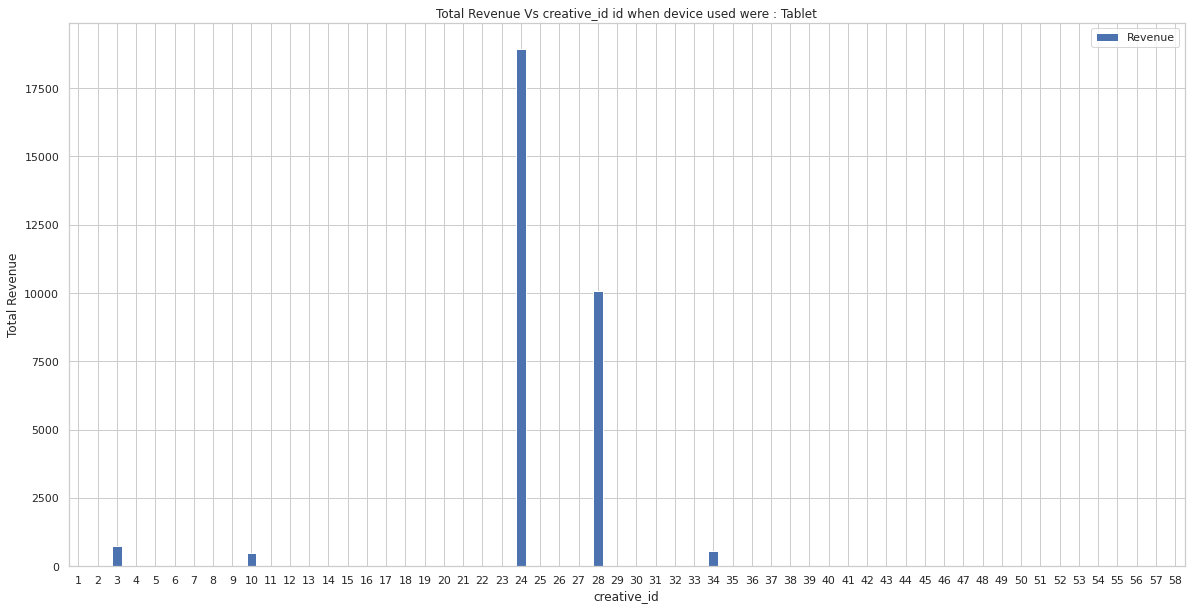

In [ ]:
Tablet_creative = Rev_vs_creative('Tablet')

From the above graph we can see the creative_id 24 and 28 has highest contribution in revenue. We can use those creative_id , for Tablet devices ,inorder to boost up the revenue. I recommend not to use creative id's which don't have any contribution in revenue.

Text(0, 0.5, 'Revenue')

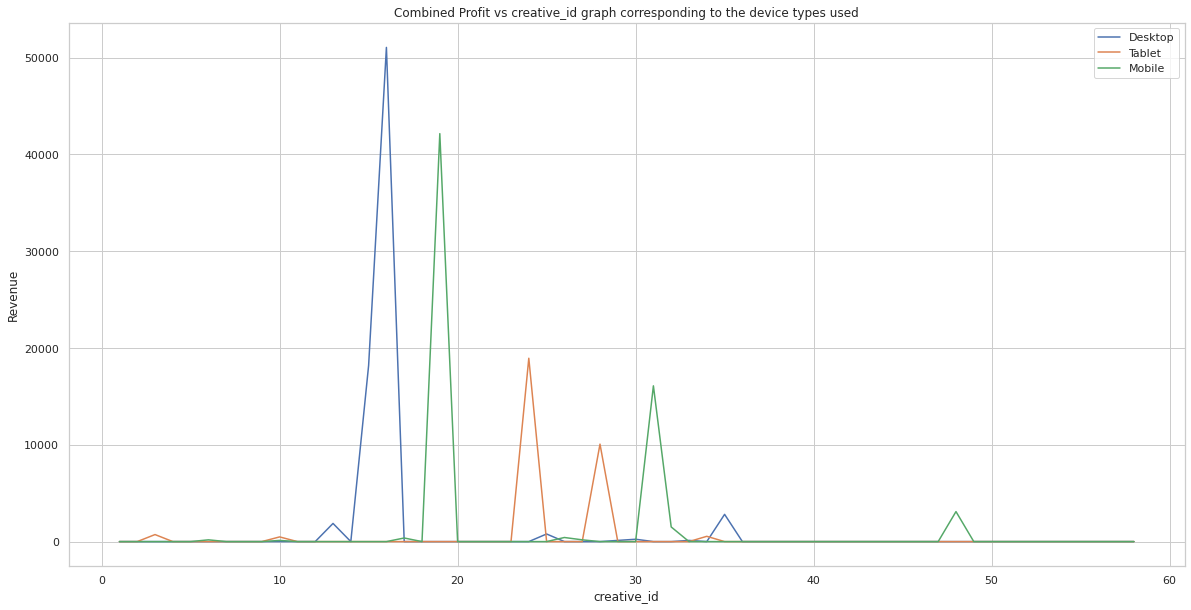

In [ ]:
#Visualization
plt.figure(figsize=(20,10))
plt.plot(Desktop_creative['creative_id'], Desktop_creative['Revenue'] , label = 'Desktop')
plt.plot(Tablet_creative['creative_id'], Tablet_creative['Revenue'] , label = 'Tablet')
plt.plot(Mobile_Creative['creative_id'], Mobile_Creative['Revenue'] , label = 'Mobile')
plt.legend()
plt.title('Combined Profit vs creative_id graph corresponding to the device types used')
plt.xlabel('creative_id')
plt.ylabel('Revenue')